In [8]:
from ultralytics import YOLO
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import supervision as sv
import numpy as np
from tqdm import tqdm

In [2]:
def load_dataset(segments_folder):
    dataset_information = []   
    for video in os.listdir(segments_folder):
        path = os.path.join(segments_folder, video)
        size = os.path.getsize(path)
        try:
            vi = sv.VideoInfo.from_video_path(path)
            dataset_information.append({
                'width': vi.width, 'height':vi.width, 'fps':vi.fps, 'total_frames':vi.total_frames, 'path':path, 'size':size
            })
        except:
            print(f'Could not open {path}')
    return pd.DataFrame(dataset_information)

df = load_dataset("segments_folder")

In [3]:
df.head()
print(len(df))


918


In [5]:
model_path = 'yolov8n.pt'
model = YOLO(model_path)  # pretrained YOLOv8n model
if not os.path.isdir('yolov8n_openvino_model/'):
    model.export(format='openvino') 
    ov_model = YOLO('yolov8n_openvino_model/', task="detect")


In [ ]:
inference_cache = 'inference_cache'
if not os.path.isdir(inference_cache):
    os.mkdir(inference_cache)

def inference(model, video):
    results_folder = 'yolov8n'
    if not os.path.isdir(os.path.join(inference_cache, results_folder)):
        os.mkdir(os.path.join(inference_cache, results_folder))
    cached_file = os.path.join(inference_cache,results_folder, os.path.basename(video).replace('.mp4', '.npy'))

    if os.path.exists(cached_file):
        speeds = np.load(cached_file)
        # tqdm.write(f'loaded {cached_file}')
    else:
        results = model.predict(video, classes=[0,1,2,3,5,7], save=True, stream=True, verbose=False)
        speeds = []
        for result in results:
            inference_time = float(result.speed['preprocess'] + result.speed['inference'] + result.speed['postprocess'])
            speeds.append(inference_time)
        np.save(cached_file, speeds)
        # print(f'saved {cached_file}')
    return np.array(speeds)

speeds = {}
with tqdm(total=len(df['path'])) as pbar:
    for video in df['path']:
        speeds[video] = inference(model, video)
        print(f'{video} mean {speeds[video].mean()}')
        pbar.update(1)

  0%|                                                                                          | 0/918 [00:00<?, ?it/s]

segments_folder\stream_0_segment_000.mp4 mean 294.9707333246867
segments_folder\stream_1000_segment_000.mp4 mean 295.15273729960126
segments_folder\stream_1001_segment_000.mp4 mean 254.86639499664307
segments_folder\stream_1002_segment_000.mp4 mean 319.19042269388837
segments_folder\stream_1004_segment_000.mp4 mean 289.82791264851886
segments_folder\stream_1006_segment_000.mp4 mean 345.29027303059894
segments_folder\stream_1007_segment_000.mp4 mean 344.34191544850665
segments_folder\stream_1008_segment_000.mp4 mean 352.437949180603
segments_folder\stream_1010_segment_000.mp4 mean 313.7530301580366


Results saved to runs\detect\predict4
  1%|▊                                                                              | 10/918 [00:40<1:01:24,  4.06s/it]

segments_folder\stream_1011_segment_000.mp4 mean 266.22580687205


Results saved to runs\detect\predict4
  1%|▉                                                                              | 11/918 [01:20<2:08:54,  8.53s/it]

segments_folder\stream_1013_segment_000.mp4 mean 262.28399594624835


Results saved to runs\detect\predict4
  1%|█                                                                              | 12/918 [01:51<2:59:50, 11.91s/it]

segments_folder\stream_1014_segment_000.mp4 mean 202.00929641723633


Results saved to runs\detect\predict4
  1%|█                                                                              | 13/918 [02:39<4:36:18, 18.32s/it]

segments_folder\stream_1015_segment_000.mp4 mean 314.1044165124956


Results saved to runs\detect\predict4
  2%|█▏                                                                             | 14/918 [03:30<6:16:29, 24.99s/it]

segments_folder\stream_1016_segment_000.mp4 mean 337.8173764546712


Results saved to runs\detect\predict4
  2%|█▎                                                                             | 15/918 [04:21<7:42:37, 30.74s/it]

segments_folder\stream_1017_segment_000.mp4 mean 332.9998715718587


Results saved to runs\detect\predict4
  2%|█▍                                                                             | 16/918 [05:12<8:56:58, 35.72s/it]

segments_folder\stream_1018_segment_000.mp4 mean 338.7761576970418


Results saved to runs\detect\predict4
  2%|█▍                                                                            | 17/918 [06:06<10:08:07, 40.50s/it]

segments_folder\stream_1019_segment_000.mp4 mean 358.65002791086835


Results saved to runs\detect\predict4
  2%|█▌                                                                            | 18/918 [06:53<10:35:20, 42.36s/it]

segments_folder\stream_101_segment_000.mp4 mean 312.1678098042806


Results saved to runs\detect\predict4
  2%|█▌                                                                            | 19/918 [07:44<11:08:13, 44.60s/it]

segments_folder\stream_1020_segment_000.mp4 mean 333.46065680185956


Results saved to runs\detect\predict4
  2%|█▋                                                                            | 20/918 [08:35<11:36:05, 46.51s/it]

segments_folder\stream_1021_segment_000.mp4 mean 336.66731348100876


Results saved to runs\detect\predict4
  2%|█▊                                                                            | 21/918 [09:28<12:02:55, 48.36s/it]

segments_folder\stream_1022_segment_000.mp4 mean 350.4320510228475


Results saved to runs\detect\predict4
  2%|█▊                                                                            | 22/918 [10:22<12:25:38, 49.93s/it]

segments_folder\stream_1023_segment_000.mp4 mean 348.31411230797863


Results saved to runs\detect\predict4
  3%|█▉                                                                            | 23/918 [11:16<12:45:27, 51.32s/it]

segments_folder\stream_1024_segment_000.mp4 mean 362.4297761917114


Results saved to runs\detect\predict4
  3%|██                                                                            | 24/918 [12:01<12:12:40, 49.17s/it]

segments_folder\stream_1025_segment_000.mp4 mean 289.4935894012451


Results saved to runs\detect\predict4
  3%|██                                                                            | 25/918 [12:38<11:20:31, 45.72s/it]

segments_folder\stream_1026_segment_000.mp4 mean 295.9598445892334


Results saved to runs\detect\predict4
  3%|██▏                                                                           | 26/918 [13:24<11:20:40, 45.79s/it]

segments_folder\stream_1027_segment_000.mp4 mean 301.4276393254598


Results saved to runs\detect\predict4
  3%|██▎                                                                            | 27/918 [13:39<9:04:59, 36.70s/it]

segments_folder\stream_1028_segment_000.mp4 mean 332.70092010498047


Results saved to runs\detect\predict4
  3%|██▍                                                                           | 28/918 [14:30<10:07:00, 40.92s/it]

segments_folder\stream_1029_segment_000.mp4 mean 335.78426361083984


Results saved to runs\detect\predict4
  3%|██▍                                                                           | 29/918 [15:22<10:54:43, 44.19s/it]

segments_folder\stream_102_segment_000.mp4 mean 340.80620606740314


Results saved to runs\detect\predict4
  3%|██▌                                                                           | 30/918 [16:12<11:19:19, 45.90s/it]

segments_folder\stream_1030_segment_000.mp4 mean 329.2555316289266


Results saved to runs\detect\predict4
  3%|██▋                                                                           | 31/918 [17:04<11:46:35, 47.80s/it]

segments_folder\stream_1031_segment_000.mp4 mean 343.7949458494881


Results saved to runs\detect\predict4
  3%|██▋                                                                           | 32/918 [17:56<12:03:05, 48.97s/it]

segments_folder\stream_1032_segment_000.mp4 mean 342.00961748758954


Results saved to runs\detect\predict4
  4%|██▊                                                                           | 33/918 [18:45<12:04:03, 49.09s/it]

segments_folder\stream_1033_segment_000.mp4 mean 326.54754002888996


Results saved to runs\detect\predict4
  4%|██▉                                                                           | 34/918 [19:40<12:26:06, 50.64s/it]

segments_folder\stream_1034_segment_000.mp4 mean 352.66933062218675


Results saved to runs\detect\predict4
  4%|██▉                                                                           | 35/918 [20:33<12:37:33, 51.48s/it]

segments_folder\stream_1035_segment_000.mp4 mean 353.45790068308514


Results saved to runs\detect\predict4
  4%|███                                                                           | 36/918 [21:24<12:32:51, 51.21s/it]

segments_folder\stream_1036_segment_000.mp4 mean 334.0164518356323


Results saved to runs\detect\predict4
  4%|███▏                                                                          | 37/918 [22:12<12:21:16, 50.48s/it]

segments_folder\stream_1037_segment_000.mp4 mean 321.98883533477783


Results saved to runs\detect\predict4
  4%|███▏                                                                          | 38/918 [23:05<12:29:15, 51.09s/it]

segments_folder\stream_103_segment_000.mp4 mean 343.8103723526001


Results saved to runs\detect\predict4
  4%|███▎                                                                          | 39/918 [23:55<12:22:36, 50.69s/it]

segments_folder\stream_104_segment_000.mp4 mean 313.735564549764


Results saved to runs\detect\predict4
  4%|███▍                                                                          | 40/918 [24:49<12:37:32, 51.77s/it]

segments_folder\stream_105_segment_000.mp4 mean 353.9109640563561


Results saved to runs\detect\predict4
  4%|███▍                                                                          | 41/918 [25:43<12:45:41, 52.38s/it]

segments_folder\stream_106_segment_000.mp4 mean 356.67463251062344


Results saved to runs\detect\predict4
  5%|███▌                                                                          | 42/918 [26:32<12:29:05, 51.31s/it]

segments_folder\stream_107_segment_000.mp4 mean 311.7699010952099


Results saved to runs\detect\predict4
  5%|███▋                                                                          | 43/918 [27:25<12:36:25, 51.87s/it]

segments_folder\stream_1082_segment_000.mp4 mean 352.58841196695965


Results saved to runs\detect\predict4
  5%|███▋                                                                          | 44/918 [28:15<12:27:38, 51.33s/it]

segments_folder\stream_1083_segment_000.mp4 mean 331.36513868967694


Results saved to runs\detect\predict4
  5%|███▊                                                                          | 45/918 [29:08<12:33:37, 51.80s/it]

segments_folder\stream_1085_segment_000.mp4 mean 350.5739863713582


Results saved to runs\detect\predict4
  5%|███▉                                                                          | 46/918 [29:59<12:31:08, 51.68s/it]

segments_folder\stream_1087_segment_000.mp4 mean 340.94160238901776


Results saved to runs\detect\predict4
  5%|███▉                                                                          | 47/918 [30:52<12:33:58, 51.94s/it]

segments_folder\stream_1089_segment_000.mp4 mean 347.85088380177814


Results saved to runs\detect\predict4
  5%|████                                                                          | 48/918 [31:47<12:47:21, 52.92s/it]

segments_folder\stream_108_segment_000.mp4 mean 361.9901657104492


Results saved to runs\detect\predict4
  5%|████▏                                                                         | 49/918 [32:37<12:34:29, 52.09s/it]

segments_folder\stream_1090_segment_000.mp4 mean 331.97797139485675


Results saved to runs\detect\predict4
  5%|████▏                                                                         | 50/918 [33:29<12:31:52, 51.97s/it]

segments_folder\stream_1091_segment_000.mp4 mean 342.7475992838542


Results saved to runs\detect\predict4
  6%|████▎                                                                         | 51/918 [34:22<12:36:27, 52.35s/it]

segments_folder\stream_1092_segment_000.mp4 mean 352.4851830800374


Results saved to runs\detect\predict4
  6%|████▍                                                                         | 52/918 [35:13<12:30:03, 51.97s/it]

segments_folder\stream_1093_segment_000.mp4 mean 337.6417287190755


Results saved to runs\detect\predict4
  6%|████▌                                                                         | 53/918 [36:06<12:35:38, 52.41s/it]

segments_folder\stream_1094_segment_000.mp4 mean 354.245343208313


Results saved to runs\detect\predict4
  6%|████▌                                                                         | 54/918 [36:58<12:31:51, 52.21s/it]

segments_folder\stream_1095_segment_000.mp4 mean 342.8652350107829


Results saved to runs\detect\predict4
  6%|████▋                                                                         | 55/918 [37:46<12:12:49, 50.95s/it]

segments_folder\stream_1096_segment_000.mp4 mean 317.90600935618085


Results saved to runs\detect\predict4
  6%|████▊                                                                         | 56/918 [38:37<12:13:26, 51.05s/it]

segments_folder\stream_1097_segment_000.mp4 mean 339.496857325236


Results saved to runs\detect\predict4
  6%|████▊                                                                         | 57/918 [39:33<12:32:32, 52.44s/it]

segments_folder\stream_109_segment_000.mp4 mean 364.97900009155273


Results saved to runs\detect\predict4
  6%|████▉                                                                         | 58/918 [40:25<12:31:11, 52.41s/it]

segments_folder\stream_10_segment_000.mp4 mean 340.98771413167316


Results saved to runs\detect\predict4
  6%|█████                                                                         | 59/918 [41:16<12:23:38, 51.94s/it]

segments_folder\stream_110_segment_000.mp4 mean 336.5333366394043


Results saved to runs\detect\predict4
  7%|█████                                                                         | 60/918 [42:06<12:12:32, 51.23s/it]

segments_folder\stream_1112_segment_000.mp4 mean 328.01857312520343


Results saved to runs\detect\predict4
  7%|█████▏                                                                        | 61/918 [42:59<12:18:08, 51.68s/it]

segments_folder\stream_1113_segment_000.mp4 mean 349.24360434214276


Results saved to runs\detect\predict4
  7%|█████▎                                                                        | 62/918 [43:50<12:15:15, 51.54s/it]

segments_folder\stream_1114_segment_000.mp4 mean 340.24314562479657


Results saved to runs\detect\predict4
  7%|█████▍                                                                         | 63/918 [43:53<8:45:40, 36.89s/it]

segments_folder\stream_1115_segment_000.mp4 mean 365.1720796312605


Results saved to runs\detect\predict4
  7%|█████▌                                                                         | 64/918 [44:43<9:42:38, 40.93s/it]

segments_folder\stream_1116_segment_000.mp4 mean 333.0621321996053


Results saved to runs\detect\predict4
  7%|█████▌                                                                        | 65/918 [45:35<10:27:39, 44.15s/it]

segments_folder\stream_1117_segment_000.mp4 mean 342.21855640411377


Results saved to runs\detect\predict4
  7%|█████▌                                                                        | 66/918 [46:27<11:02:45, 46.67s/it]

segments_folder\stream_1118_segment_000.mp4 mean 347.56213188171387


Results saved to runs\detect\predict4
  7%|█████▋                                                                        | 67/918 [47:20<11:26:34, 48.41s/it]

segments_folder\stream_111_segment_000.mp4 mean 352.30959441563857


Results saved to runs\detect\predict4
  7%|█████▊                                                                        | 68/918 [48:11<11:36:58, 49.20s/it]

segments_folder\stream_1120_segment_000.mp4 mean 336.02651855014017


Results saved to runs\detect\predict4
  8%|█████▊                                                                        | 69/918 [49:01<11:41:04, 49.55s/it]

segments_folder\stream_1121_segment_000.mp4 mean 349.607724409837


Results saved to runs\detect\predict4
  8%|█████▉                                                                        | 70/918 [49:46<11:19:17, 48.06s/it]

segments_folder\stream_1122_segment_000.mp4 mean 353.2570095062256


Results saved to runs\detect\predict4
  8%|██████                                                                        | 71/918 [50:38<11:36:34, 49.34s/it]

segments_folder\stream_1124_segment_000.mp4 mean 346.5690231323242


Results saved to runs\detect\predict4
  8%|██████▏                                                                        | 72/918 [51:02<9:48:46, 41.76s/it]

segments_folder\stream_1125_segment_000.mp4 mean 344.676339108011


Results saved to runs\detect\predict4
  8%|██████▏                                                                       | 73/918 [51:55<10:34:53, 45.08s/it]

segments_folder\stream_1127_segment_000.mp4 mean 349.8333199818929


Results saved to runs\detect\predict4
  8%|██████▎                                                                       | 74/918 [52:43<10:46:40, 45.97s/it]

segments_folder\stream_1128_segment_000.mp4 mean 317.7661927541097


Results saved to runs\detect\predict4
  8%|██████▍                                                                        | 75/918 [53:09<9:20:16, 39.88s/it]

segments_folder\stream_1129_segment_000.mp4 mean 320.0409593461435


Results saved to runs\detect\predict4
  8%|██████▍                                                                       | 76/918 [54:02<10:17:27, 44.00s/it]

segments_folder\stream_112_segment_000.mp4 mean 353.92509937286377


Results saved to runs\detect\predict4
  8%|██████▌                                                                       | 77/918 [54:53<10:47:12, 46.17s/it]

segments_folder\stream_1130_segment_000.mp4 mean 344.01407918414554


Results saved to runs\detect\predict4
  8%|██████▋                                                                       | 78/918 [55:46<11:13:27, 48.10s/it]

segments_folder\stream_1131_segment_000.mp4 mean 348.82087389628094


Results saved to runs\detect\predict4
  9%|██████▋                                                                       | 79/918 [56:40<11:35:24, 49.73s/it]

segments_folder\stream_1132_segment_000.mp4 mean 352.2790062506467


Results saved to runs\detect\predict4
  9%|██████▊                                                                       | 80/918 [57:31<11:39:58, 50.12s/it]

segments_folder\stream_1133_segment_000.mp4 mean 338.37848981221515


Results saved to runs\detect\predict4
  9%|██████▉                                                                       | 81/918 [58:22<11:46:02, 50.61s/it]

segments_folder\stream_1134_segment_000.mp4 mean 343.0996545155843


Results saved to runs\detect\predict4
  9%|██████▉                                                                       | 82/918 [59:13<11:47:17, 50.76s/it]

segments_folder\stream_1135_segment_000.mp4 mean 338.8756974538167


Results saved to runs\detect\predict4
  9%|███████▏                                                                       | 83/918 [59:37<9:52:14, 42.56s/it]

segments_folder\stream_1136_segment_000.mp4 mean 335.32958790875864


Results saved to runs\detect\predict4
  9%|███████                                                                      | 84/918 [1:00:14<9:30:41, 41.06s/it]

segments_folder\stream_1137_segment_000.mp4 mean 352.31584647916395


Results saved to runs\detect\predict4
  9%|███████                                                                     | 85/918 [1:01:07<10:16:06, 44.38s/it]

segments_folder\stream_1138_segment_000.mp4 mean 345.40247917175293


Results saved to runs\detect\predict4
  9%|███████                                                                     | 86/918 [1:01:56<10:36:30, 45.90s/it]

segments_folder\stream_1139_segment_000.mp4 mean 327.5931723912557


Results saved to runs\detect\predict4
  9%|███████▏                                                                    | 87/918 [1:02:47<10:57:47, 47.49s/it]

segments_folder\stream_113_segment_000.mp4 mean 339.4230302174886


Results saved to runs\detect\predict4
 10%|███████▍                                                                     | 88/918 [1:03:05<8:55:56, 38.74s/it]

segments_folder\stream_1141_segment_000.mp4 mean 296.77696313176835


Results saved to runs\detect\predict4
 10%|███████▍                                                                     | 89/918 [1:03:58<9:53:29, 42.96s/it]

segments_folder\stream_1142_segment_000.mp4 mean 350.3697617848714


Results saved to runs\detect\predict4
 10%|███████▍                                                                    | 90/918 [1:05:44<14:12:54, 61.81s/it]

segments_folder\stream_1143_segment_000.mp4 mean 346.20197560874914


Results saved to runs\detect\predict4
 10%|███████▌                                                                    | 91/918 [1:06:26<12:48:56, 55.79s/it]

segments_folder\stream_1144_segment_000.mp4 mean 276.5214093526204


Results saved to runs\detect\predict4
 10%|███████▌                                                                    | 92/918 [1:07:14<12:16:03, 53.47s/it]

segments_folder\stream_1145_segment_000.mp4 mean 318.4488805135091


Results saved to runs\detect\predict4
 10%|███████▋                                                                    | 93/918 [1:08:02<11:52:11, 51.80s/it]

segments_folder\stream_1146_segment_000.mp4 mean 316.68903827667236


Results saved to runs\detect\predict4
 10%|███████▊                                                                    | 94/918 [1:08:54<11:51:37, 51.82s/it]

segments_folder\stream_1147_segment_000.mp4 mean 342.86454995473224


Results saved to runs\detect\predict4
 10%|███████▉                                                                     | 95/918 [1:08:54<8:18:55, 36.37s/it]

segments_folder\stream_1148_segment_000.mp4 mean 291.35632514953613


Results saved to runs\detect\predict4
 10%|████████                                                                     | 96/918 [1:09:46<9:22:25, 41.05s/it]

segments_folder\stream_1149_segment_000.mp4 mean 344.37613010406494


Results saved to runs\detect\predict4
 11%|████████                                                                    | 97/918 [1:10:39<10:09:39, 44.55s/it]

segments_folder\stream_114_segment_000.mp4 mean 347.76965141296387


Results saved to runs\detect\predict4
 11%|████████                                                                    | 98/918 [1:11:30<10:37:51, 46.67s/it]

segments_folder\stream_1150_segment_000.mp4 mean 341.4347553253174


Results saved to runs\detect\predict4
 11%|████████▏                                                                   | 99/918 [1:12:23<11:00:43, 48.40s/it]

segments_folder\stream_1151_segment_000.mp4 mean 344.50116062795877


Results saved to runs\detect\predict4
 11%|████████▏                                                                  | 100/918 [1:13:15<11:14:16, 49.46s/it]

segments_folder\stream_1152_segment_000.mp4 mean 342.5850709279378


Results saved to runs\detect\predict4
 11%|████████▎                                                                  | 101/918 [1:14:09<11:32:39, 50.87s/it]

segments_folder\stream_1153_segment_000.mp4 mean 357.8319851557414


Results saved to runs\detect\predict4
 11%|████████▎                                                                  | 102/918 [1:15:01<11:36:23, 51.21s/it]

segments_folder\stream_1154_segment_000.mp4 mean 343.9483626683553


Results saved to runs\detect\predict4
 11%|████████▍                                                                  | 103/918 [1:15:52<11:33:38, 51.07s/it]

segments_folder\stream_1155_segment_000.mp4 mean 335.02580483754474


Results saved to runs\detect\predict4
 11%|████████▍                                                                  | 104/918 [1:16:44<11:38:09, 51.46s/it]

segments_folder\stream_1157_segment_000.mp4 mean 347.1361223856608


Results saved to runs\detect\predict4
 11%|████████▌                                                                  | 105/918 [1:17:35<11:37:20, 51.46s/it]

segments_folder\stream_1158_segment_000.mp4 mean 340.63573519388837


Results saved to runs\detect\predict4
 12%|████████▋                                                                  | 106/918 [1:18:26<11:32:35, 51.18s/it]

segments_folder\stream_1159_segment_000.mp4 mean 335.11613845825195


Results saved to runs\detect\predict4
 12%|████████▋                                                                  | 107/918 [1:19:16<11:28:18, 50.92s/it]

segments_folder\stream_115_segment_000.mp4 mean 362.4022603034973


Results saved to runs\detect\predict4
 12%|████████▉                                                                   | 108/918 [1:19:34<9:14:03, 41.04s/it]

segments_folder\stream_1160_segment_000.mp4 mean 297.3167982968417


Results saved to runs\detect\predict4
 12%|████████▉                                                                  | 109/918 [1:20:27<10:01:59, 44.65s/it]

segments_folder\stream_1161_segment_000.mp4 mean 350.76555887858075


Results saved to runs\detect\predict4
 12%|████████▉                                                                  | 110/918 [1:21:15<10:13:16, 45.54s/it]

segments_folder\stream_1162_segment_000.mp4 mean 314.39780871073407


Results saved to runs\detect\predict4
 12%|█████████                                                                  | 111/918 [1:22:07<10:38:10, 47.45s/it]

segments_folder\stream_1163_segment_000.mp4 mean 343.9323631922404


Results saved to runs\detect\predict4
 12%|█████████▏                                                                 | 112/918 [1:22:55<10:39:19, 47.59s/it]

segments_folder\stream_1165_segment_000.mp4 mean 317.48458703358966


Results saved to runs\detect\predict4
 12%|█████████▏                                                                 | 113/918 [1:23:49<11:05:07, 49.57s/it]

segments_folder\stream_1166_segment_000.mp4 mean 358.902850151062


Results saved to runs\detect\predict4
 12%|█████████▎                                                                 | 114/918 [1:24:42<11:16:51, 50.51s/it]

segments_folder\stream_1167_segment_000.mp4 mean 349.1440550486247


Results saved to runs\detect\predict4
 13%|█████████▍                                                                 | 115/918 [1:25:36<11:29:54, 51.55s/it]

segments_folder\stream_1168_segment_000.mp4 mean 356.12918841128317


Results saved to runs\detect\predict4
 13%|█████████▍                                                                 | 116/918 [1:26:28<11:34:15, 51.94s/it]

segments_folder\stream_1169_segment_000.mp4 mean 349.8557408650716


Results saved to runs\detect\predict4
 13%|█████████▌                                                                 | 117/918 [1:27:22<11:40:50, 52.50s/it]

segments_folder\stream_116_segment_000.mp4 mean 357.2945868646776


Results saved to runs\detect\predict4
 13%|█████████▋                                                                 | 118/918 [1:28:13<11:32:16, 51.92s/it]

segments_folder\stream_1170_segment_000.mp4 mean 334.76599375406903


Results saved to runs\detect\predict4
 13%|█████████▋                                                                 | 119/918 [1:29:06<11:37:39, 52.39s/it]

segments_folder\stream_1171_segment_000.mp4 mean 354.6376848220825


Results saved to runs\detect\predict4
 13%|█████████▊                                                                 | 120/918 [1:29:59<11:36:54, 52.40s/it]

segments_folder\stream_1172_segment_000.mp4 mean 346.9582986831665


Results saved to runs\detect\predict4
 13%|█████████▉                                                                 | 121/918 [1:30:51<11:36:54, 52.47s/it]

segments_folder\stream_1174_segment_000.mp4 mean 348.3662223815918


Results saved to runs\detect\predict4
 13%|█████████▉                                                                 | 122/918 [1:31:43<11:32:59, 52.24s/it]

segments_folder\stream_1175_segment_000.mp4 mean 342.36273288726807


Results saved to runs\detect\predict4
 13%|██████████                                                                 | 123/918 [1:32:36<11:34:58, 52.45s/it]

segments_folder\stream_1176_segment_000.mp4 mean 350.8564217885335


Results saved to runs\detect\predict4
 14%|██████████▏                                                                | 124/918 [1:33:27<11:27:38, 51.96s/it]

segments_folder\stream_1177_segment_000.mp4 mean 336.8261496225993


Results saved to runs\detect\predict4
 14%|██████████▏                                                                | 125/918 [1:34:54<13:46:19, 62.52s/it]

segments_folder\stream_1178_segment_000.mp4 mean 348.07868976982274


Results saved to runs\detect\predict4
 14%|██████████▎                                                                | 126/918 [1:35:46<13:01:57, 59.24s/it]

segments_folder\stream_1179_segment_000.mp4 mean 340.4378430048625


Results saved to runs\detect\predict4
 14%|██████████▍                                                                | 127/918 [1:36:40<12:42:16, 57.82s/it]

segments_folder\stream_117_segment_000.mp4 mean 358.4636656443278


Results saved to runs\detect\predict4
 14%|██████████▍                                                                | 128/918 [1:37:33<12:23:22, 56.46s/it]

segments_folder\stream_1180_segment_000.mp4 mean 353.1283489863078


Results saved to runs\detect\predict4
 14%|██████████▌                                                                | 129/918 [1:38:22<11:50:49, 54.06s/it]

segments_folder\stream_1181_segment_000.mp4 mean 320.63008467356366


Results saved to runs\detect\predict4
 14%|██████████▌                                                                | 130/918 [1:39:14<11:41:20, 53.40s/it]

segments_folder\stream_1182_segment_000.mp4 mean 343.3823521931966


Results saved to runs\detect\predict4
 14%|██████████▋                                                                | 131/918 [1:40:07<11:41:50, 53.51s/it]

segments_folder\stream_1183_segment_000.mp4 mean 355.6799014409383


Results saved to runs\detect\predict4
 14%|██████████▊                                                                | 132/918 [1:40:59<11:33:20, 52.93s/it]

segments_folder\stream_1184_segment_000.mp4 mean 341.4686361948649


Results saved to runs\detect\predict4
 14%|██████████▊                                                                | 133/918 [1:41:53<11:37:00, 53.27s/it]

segments_folder\stream_1185_segment_000.mp4 mean 355.1228741146871


Results saved to runs\detect\predict4
 15%|██████████▉                                                                | 134/918 [1:42:38<11:04:58, 50.89s/it]

segments_folder\stream_1186_segment_000.mp4 mean 299.6983051300049


Results saved to runs\detect\predict4
 15%|███████████                                                                | 135/918 [1:43:29<11:03:03, 50.81s/it]

segments_folder\stream_1187_segment_000.mp4 mean 332.6068682386386


Results saved to runs\detect\predict4
 15%|███████████                                                                | 136/918 [1:44:23<11:13:35, 51.68s/it]

segments_folder\stream_1188_segment_000.mp4 mean 352.8540738423665


Results saved to runs\detect\predict4
 15%|███████████▎                                                                | 137/918 [1:44:47<9:27:00, 43.56s/it]

segments_folder\stream_1189_segment_000.mp4 mean 312.7046948048606


Results saved to runs\detect\predict4
 15%|███████████▎                                                               | 138/918 [1:45:42<10:10:52, 46.99s/it]

segments_folder\stream_118_segment_000.mp4 mean 361.38712247212726


Results saved to runs\detect\predict4
 15%|███████████▎                                                               | 139/918 [1:46:35<10:31:03, 48.61s/it]

segments_folder\stream_1190_segment_000.mp4 mean 345.76305230458576


Results saved to runs\detect\predict4
 15%|███████████▍                                                               | 140/918 [1:47:27<10:46:23, 49.85s/it]

segments_folder\stream_1192_segment_000.mp4 mean 346.6925873661673


Results saved to runs\detect\predict4
 15%|███████████▌                                                               | 141/918 [1:48:18<10:47:50, 50.03s/it]

segments_folder\stream_1193_segment_000.mp4 mean 334.3676471710205


Results saved to runs\detect\predict4
 15%|███████████▌                                                               | 142/918 [1:49:09<10:51:21, 50.36s/it]

segments_folder\stream_1196_segment_000.mp4 mean 338.3325258890788


Results saved to runs\detect\predict4
 16%|███████████▋                                                               | 143/918 [1:50:03<11:03:13, 51.35s/it]

segments_folder\stream_1197_segment_000.mp4 mean 354.6168899536133


Results saved to runs\detect\predict4
 16%|███████████▊                                                               | 144/918 [1:50:54<11:00:20, 51.19s/it]

segments_folder\stream_1198_segment_000.mp4 mean 336.53549035390216


Results saved to runs\detect\predict4
 16%|███████████▊                                                               | 145/918 [1:52:35<14:13:34, 66.25s/it]

segments_folder\stream_119_segment_000.mp4 mean 333.2073138310359


Results saved to runs\detect\predict4
 16%|███████████▉                                                               | 146/918 [1:53:20<12:49:32, 59.81s/it]

segments_folder\stream_11_segment_000.mp4 mean 292.51664956410724


Results saved to runs\detect\predict4
 16%|████████████                                                               | 147/918 [1:54:08<12:03:23, 56.30s/it]

segments_folder\stream_1202_segment_000.mp4 mean 316.50659895890595


Results saved to runs\detect\predict4
 16%|████████████                                                               | 148/918 [1:54:55<11:28:50, 53.68s/it]

segments_folder\stream_1203_segment_000.mp4 mean 315.0378719965617


Results saved to runs\detect\predict4
 16%|████████████▏                                                              | 149/918 [1:55:44<11:09:48, 52.26s/it]

segments_folder\stream_1205_segment_000.mp4 mean 324.30659135182697


Results saved to runs\detect\predict4
 16%|████████████▍                                                               | 150/918 [1:56:10<9:26:16, 44.24s/it]

segments_folder\stream_1206_segment_000.mp4 mean 302.59889437828537


Results saved to runs\detect\predict4
 16%|████████████▌                                                               | 151/918 [1:56:36<8:15:43, 38.78s/it]

segments_folder\stream_1207_segment_000.mp4 mean 299.7280054314192


Results saved to runs\detect\predict4
 17%|████████████▌                                                               | 152/918 [1:56:54<6:54:51, 32.50s/it]

segments_folder\stream_1208_segment_000.mp4 mean 305.91411502272996


Results saved to runs\detect\predict4
 17%|████████████▋                                                               | 153/918 [1:57:44<8:03:55, 37.95s/it]

segments_folder\stream_1209_segment_000.mp4 mean 332.86977130056215


Results saved to runs\detect\predict4
 17%|████████████▋                                                               | 154/918 [1:58:40<9:11:33, 43.32s/it]

segments_folder\stream_120_segment_000.mp4 mean 365.93511899312335


Results saved to runs\detect\predict4
 17%|████████████▊                                                               | 155/918 [1:59:34<9:50:58, 46.47s/it]

segments_folder\stream_1210_segment_000.mp4 mean 356.39551480611163


Results saved to runs\detect\predict4
 17%|████████████▋                                                              | 156/918 [2:00:29<10:21:17, 48.92s/it]

segments_folder\stream_1212_segment_000.mp4 mean 362.1073277791341


Results saved to runs\detect\predict4
 17%|████████████▊                                                              | 157/918 [2:01:23<10:40:10, 50.47s/it]

segments_folder\stream_1213_segment_000.mp4 mean 357.89839426676434


Results saved to runs\detect\predict4
 17%|████████████▉                                                              | 158/918 [2:02:16<10:50:04, 51.32s/it]

segments_folder\stream_1214_segment_000.mp4 mean 352.9831600189209


Results saved to runs\detect\predict4
 17%|████████████▉                                                              | 159/918 [2:03:10<11:00:29, 52.21s/it]

segments_folder\stream_1215_segment_000.mp4 mean 358.6540985107422


Results saved to runs\detect\predict4
 17%|█████████████                                                              | 160/918 [2:04:05<11:09:51, 53.02s/it]

segments_folder\stream_1216_segment_000.mp4 mean 363.8367207845052


Results saved to runs\detect\predict4
 18%|█████████████▏                                                             | 161/918 [2:04:41<10:01:44, 47.69s/it]

segments_folder\stream_1218_segment_000.mp4 mean 355.23032655521314


Results saved to runs\detect\predict4
 18%|█████████████▏                                                             | 162/918 [2:05:35<10:27:46, 49.82s/it]

segments_folder\stream_1220_segment_000.mp4 mean 363.4865665435791


Results saved to runs\detect\predict4
 18%|█████████████▎                                                             | 163/918 [2:06:27<10:34:36, 50.43s/it]

segments_folder\stream_1221_segment_000.mp4 mean 340.98011926309954


Results saved to runs\detect\predict4
 18%|█████████████▍                                                             | 164/918 [2:07:20<10:42:34, 51.13s/it]

segments_folder\stream_1222_segment_000.mp4 mean 349.919638633728


Results saved to runs\detect\predict4
 18%|█████████████▍                                                             | 165/918 [2:08:07<10:27:02, 49.96s/it]

segments_folder\stream_1223_segment_000.mp4 mean 313.21166674296063


Results saved to runs\detect\predict4
 18%|█████████████▌                                                             | 166/918 [2:09:02<10:43:46, 51.37s/it]

segments_folder\stream_1224_segment_000.mp4 mean 361.34602387746173


Results saved to runs\detect\predict4
 18%|█████████████▋                                                             | 167/918 [2:09:49<10:27:21, 50.12s/it]

segments_folder\stream_1225_segment_000.mp4 mean 357.4395143348752


Results saved to runs\detect\predict4
 18%|█████████████▋                                                             | 168/918 [2:10:44<10:43:36, 51.49s/it]

segments_folder\stream_1226_segment_000.mp4 mean 361.75892035166424


Results saved to runs\detect\predict4
 18%|█████████████▊                                                             | 169/918 [2:11:36<10:47:24, 51.86s/it]

segments_folder\stream_1227_segment_000.mp4 mean 349.8987070719401


Results saved to runs\detect\predict4
 19%|█████████████▉                                                             | 170/918 [2:12:32<11:00:04, 52.95s/it]

segments_folder\stream_1229_segment_000.mp4 mean 366.5677007039388


Results saved to runs\detect\predict4
 19%|█████████████▉                                                             | 171/918 [2:13:26<11:01:43, 53.15s/it]

segments_folder\stream_122_segment_000.mp4 mean 350.74214458465576


Results saved to runs\detect\predict4
 19%|██████████████                                                             | 172/918 [2:14:19<11:03:15, 53.35s/it]

segments_folder\stream_1230_segment_000.mp4 mean 356.7149845759074


Results saved to runs\detect\predict4
 19%|██████████████▏                                                            | 173/918 [2:15:08<10:45:01, 51.95s/it]

segments_folder\stream_1231_segment_000.mp4 mean 322.3544692993164


Results saved to runs\detect\predict4
 19%|██████████████▏                                                            | 174/918 [2:15:58<10:37:01, 51.37s/it]

segments_folder\stream_1232_segment_000.mp4 mean 331.7280038197835


Results saved to runs\detect\predict4
 19%|██████████████▎                                                            | 175/918 [2:16:44<10:17:36, 49.87s/it]

segments_folder\stream_1233_segment_000.mp4 mean 307.7418518066406


Results saved to runs\detect\predict4
 19%|██████████████▍                                                            | 176/918 [2:17:36<10:24:06, 50.47s/it]

segments_folder\stream_1234_segment_000.mp4 mean 343.0575307210286


Results saved to runs\detect\predict4
 19%|██████████████▍                                                            | 177/918 [2:18:24<10:11:09, 49.49s/it]

segments_folder\stream_1235_segment_000.mp4 mean 311.2993876139323


Results saved to runs\detect\predict4
 19%|██████████████▌                                                            | 178/918 [2:19:11<10:04:27, 49.01s/it]

segments_folder\stream_123_segment_000.mp4 mean 312.11524963378906


Results saved to runs\detect\predict4
 19%|██████████████▊                                                             | 179/918 [2:19:59<9:57:23, 48.50s/it]

segments_folder\stream_124_segment_000.mp4 mean 341.614330516142


Results saved to runs\detect\predict4
 20%|██████████████▋                                                            | 180/918 [2:20:52<10:14:13, 49.94s/it]

segments_folder\stream_125_segment_000.mp4 mean 353.6706792341696


Results saved to runs\detect\predict4
 20%|██████████████▉                                                             | 181/918 [2:21:34<9:42:17, 47.41s/it]

segments_folder\stream_126_segment_000.mp4 mean 271.3351885477702


Results saved to runs\detect\predict4
 20%|███████████████                                                             | 182/918 [2:22:11<9:05:16, 44.45s/it]

segments_folder\stream_127_segment_000.mp4 mean 244.62838490804037


Results saved to runs\detect\predict4
 20%|███████████████▏                                                            | 183/918 [2:22:48<8:36:13, 42.14s/it]

segments_folder\stream_128_segment_000.mp4 mean 239.56053415934244


Results saved to runs\detect\predict4
 20%|███████████████                                                            | 184/918 [2:24:30<12:14:35, 60.05s/it]

segments_folder\stream_129_segment_000.mp4 mean 334.4220908482869


Results saved to runs\detect\predict4
 20%|███████████████                                                            | 185/918 [2:25:16<11:25:04, 56.08s/it]

segments_folder\stream_12_segment_000.mp4 mean 305.3353675206502


Results saved to runs\detect\predict4
 20%|███████████████▏                                                           | 186/918 [2:26:06<11:00:41, 54.16s/it]

segments_folder\stream_130_segment_000.mp4 mean 326.6373014450073


Results saved to runs\detect\predict4
 20%|███████████████▎                                                           | 187/918 [2:27:01<11:02:01, 54.34s/it]

segments_folder\stream_131_segment_000.mp4 mean 360.006464322408


Results saved to runs\detect\predict4
 20%|███████████████▎                                                           | 188/918 [2:27:48<10:35:18, 52.22s/it]

segments_folder\stream_132_segment_000.mp4 mean 310.3119150797526


Results saved to runs\detect\predict4
 21%|███████████████▍                                                           | 189/918 [2:28:42<10:41:30, 52.80s/it]

segments_folder\stream_133_segment_000.mp4 mean 355.01871426900226


Results saved to runs\detect\predict4
 21%|███████████████▌                                                           | 190/918 [2:29:34<10:37:20, 52.53s/it]

segments_folder\stream_134_segment_000.mp4 mean 339.4980065027873


Results saved to runs\detect\predict4
 21%|███████████████▌                                                           | 191/918 [2:30:25<10:28:31, 51.87s/it]

segments_folder\stream_135_segment_000.mp4 mean 333.2773272196452


Results saved to runs\detect\predict4
 21%|███████████████▋                                                           | 192/918 [2:31:15<10:20:41, 51.30s/it]

segments_folder\stream_136_segment_000.mp4 mean 326.798415184021


Results saved to runs\detect\predict4
 21%|███████████████▉                                                            | 193/918 [2:32:00<9:58:18, 49.52s/it]

segments_folder\stream_137_segment_000.mp4 mean 296.0621976852417


Results saved to runs\detect\predict4
 21%|████████████████                                                            | 194/918 [2:32:49<9:56:37, 49.44s/it]

segments_folder\stream_138_segment_000.mp4 mean 327.5869971997029


Results saved to runs\detect\predict4
 21%|███████████████▉                                                           | 195/918 [2:33:42<10:08:25, 50.49s/it]

segments_folder\stream_139_segment_000.mp4 mean 347.12507406870526


Results saved to runs\detect\predict4
 21%|████████████████                                                           | 196/918 [2:34:34<10:11:50, 50.85s/it]

segments_folder\stream_13_segment_000.mp4 mean 342.51949916014803


Results saved to runs\detect\predict4
 21%|████████████████▎                                                           | 197/918 [2:35:21<9:57:59, 49.76s/it]

segments_folder\stream_140_segment_000.mp4 mean 307.7230151494344


Results saved to runs\detect\predict4
 22%|████████████████▏                                                          | 198/918 [2:36:16<10:15:08, 51.26s/it]

segments_folder\stream_141_segment_000.mp4 mean 355.52598624829426


Results saved to runs\detect\predict4
 22%|████████████████▎                                                          | 199/918 [2:37:05<10:08:26, 50.77s/it]

segments_folder\stream_142_segment_000.mp4 mean 324.24830595652264


Results saved to runs\detect\predict4
 22%|████████████████▌                                                           | 200/918 [2:37:49<9:43:28, 48.76s/it]

segments_folder\stream_143_segment_000.mp4 mean 291.7410405476888


Results saved to runs\detect\predict4
 22%|████████████████▋                                                           | 201/918 [2:38:42<9:54:26, 49.74s/it]

segments_folder\stream_144_segment_000.mp4 mean 340.9296290079753


Results saved to runs\detect\predict4
 22%|████████████████▌                                                          | 202/918 [2:39:34<10:04:14, 50.63s/it]

segments_folder\stream_145_segment_000.mp4 mean 349.36189492543537


Results saved to runs\detect\predict4
 22%|████████████████▌                                                          | 203/918 [2:40:28<10:15:12, 51.63s/it]

segments_folder\stream_146_segment_000.mp4 mean 352.75810559590656


Results saved to runs\detect\predict4
 22%|████████████████▋                                                          | 204/918 [2:41:23<10:24:05, 52.45s/it]

segments_folder\stream_147_segment_000.mp4 mean 359.86596829182395


Results saved to runs\detect\predict4
 22%|████████████████▋                                                          | 205/918 [2:42:09<10:03:36, 50.79s/it]

segments_folder\stream_148_segment_000.mp4 mean 307.1892007191976


Results saved to runs\detect\predict4
 22%|████████████████▊                                                          | 206/918 [2:43:03<10:10:42, 51.46s/it]

segments_folder\stream_149_segment_000.mp4 mean 346.4232126871745


Results saved to runs\detect\predict4
 23%|████████████████▉                                                          | 207/918 [2:43:57<10:19:10, 52.25s/it]

segments_folder\stream_14_segment_000.mp4 mean 354.0865437189738


Results saved to runs\detect\predict4
 23%|████████████████▉                                                          | 208/918 [2:44:50<10:22:10, 52.58s/it]

segments_folder\stream_150_segment_000.mp4 mean 348.05477142333984


Results saved to runs\detect\predict4
 23%|█████████████████                                                          | 209/918 [2:45:43<10:24:44, 52.87s/it]

segments_folder\stream_151_segment_000.mp4 mean 351.6432237625122


Results saved to runs\detect\predict4
 23%|█████████████████▏                                                         | 210/918 [2:46:31<10:04:11, 51.20s/it]

segments_folder\stream_152_segment_000.mp4 mean 310.37006219228107


Results saved to runs\detect\predict4
 23%|█████████████████▍                                                          | 211/918 [2:47:18<9:48:34, 49.95s/it]

segments_folder\stream_153_segment_000.mp4 mean 305.8925612767537


Results saved to runs\detect\predict4
 23%|█████████████████▌                                                          | 212/918 [2:48:04<9:35:28, 48.91s/it]

segments_folder\stream_154_segment_000.mp4 mean 303.4302552541097


Results saved to runs\detect\predict4
 23%|█████████████████▋                                                          | 213/918 [2:48:51<9:28:36, 48.39s/it]

segments_folder\stream_155_segment_000.mp4 mean 308.6035140355428


Results saved to runs\detect\predict4
 23%|█████████████████▋                                                          | 214/918 [2:49:43<9:38:43, 49.32s/it]

segments_folder\stream_156_segment_000.mp4 mean 336.907213528951


Results saved to runs\detect\predict4
 23%|█████████████████▊                                                          | 215/918 [2:50:36<9:52:17, 50.55s/it]

segments_folder\stream_157_segment_000.mp4 mean 349.6086549758911


Results saved to runs\detect\predict4
 24%|█████████████████▋                                                         | 216/918 [2:51:33<10:11:32, 52.27s/it]

segments_folder\stream_158_segment_000.mp4 mean 368.9530849456787


Results saved to runs\detect\predict4
 24%|█████████████████▋                                                         | 217/918 [2:52:28<10:21:46, 53.22s/it]

segments_folder\stream_159_segment_000.mp4 mean 362.611444791158


Results saved to runs\detect\predict4
 24%|█████████████████▊                                                         | 218/918 [2:53:25<10:34:13, 54.36s/it]

segments_folder\stream_15_segment_000.mp4 mean 374.00818665822345


Results saved to runs\detect\predict4
 24%|█████████████████▉                                                         | 219/918 [2:54:18<10:27:13, 53.84s/it]

segments_folder\stream_161_segment_000.mp4 mean 344.55391724904376


Results saved to runs\detect\predict4
 24%|█████████████████▉                                                         | 220/918 [2:55:15<10:38:35, 54.89s/it]

segments_folder\stream_162_segment_000.mp4 mean 377.23320960998535


Results saved to runs\detect\predict4
 24%|██████████████████                                                         | 221/918 [2:56:07<10:27:28, 54.01s/it]

segments_folder\stream_163_segment_000.mp4 mean 343.69580268859863


Results saved to runs\detect\predict4
 24%|██████████████████▏                                                        | 222/918 [2:57:05<10:39:33, 55.13s/it]

segments_folder\stream_164_segment_000.mp4 mean 377.49853293100995


Results saved to runs\detect\predict4
 24%|██████████████████▏                                                        | 223/918 [2:58:01<10:41:14, 55.36s/it]

segments_folder\stream_166_segment_000.mp4 mean 366.96343898773193


Results saved to runs\detect\predict4
 24%|██████████████████▎                                                        | 224/918 [2:58:58<10:46:30, 55.89s/it]

segments_folder\stream_167_segment_000.mp4 mean 374.4985883599085


Results saved to runs\detect\predict4
 25%|██████████████████▍                                                        | 225/918 [2:59:54<10:47:01, 56.02s/it]

segments_folder\stream_168_segment_000.mp4 mean 370.1337671279907


Results saved to runs\detect\predict4
 25%|██████████████████▍                                                        | 226/918 [3:00:54<11:00:33, 57.27s/it]

segments_folder\stream_169_segment_000.mp4 mean 397.7447764078776


Results saved to runs\detect\predict4
 25%|██████████████████▌                                                        | 227/918 [3:01:50<10:55:17, 56.90s/it]

segments_folder\stream_16_segment_000.mp4 mean 366.5848207473755


Results saved to runs\detect\predict4
 25%|██████████████████▋                                                        | 228/918 [3:02:46<10:50:02, 56.52s/it]

segments_folder\stream_170_segment_000.mp4 mean 366.16675694783527


Results saved to runs\detect\predict4
 25%|██████████████████▋                                                        | 229/918 [3:03:41<10:42:36, 55.96s/it]

segments_folder\stream_171_segment_000.mp4 mean 386.9550568716867


Results saved to runs\detect\predict4
 25%|██████████████████▊                                                        | 230/918 [3:04:35<10:34:39, 55.35s/it]

segments_folder\stream_172_segment_000.mp4 mean 394.74196434020996


Results saved to runs\detect\predict4
 25%|██████████████████▊                                                        | 231/918 [3:05:24<10:13:46, 53.61s/it]

segments_folder\stream_173_segment_000.mp4 mean 361.90919169673214


Results saved to runs\detect\predict4
 25%|██████████████████▉                                                        | 232/918 [3:06:20<10:19:56, 54.22s/it]

segments_folder\stream_174_segment_000.mp4 mean 367.7528190612793


Results saved to runs\detect\predict4
 25%|███████████████████▎                                                        | 233/918 [3:07:08<9:59:23, 52.50s/it]

segments_folder\stream_175_segment_000.mp4 mean 351.3098481823416


Results saved to runs\detect\predict4
 25%|███████████████████▎                                                        | 234/918 [3:08:01<9:58:51, 52.53s/it]

segments_folder\stream_176_segment_000.mp4 mean 330.05673090616864


Results saved to runs\detect\predict4
 26%|███████████████████▍                                                        | 235/918 [3:08:52<9:52:49, 52.08s/it]

segments_folder\stream_178_segment_000.mp4 mean 337.0201412836711


Results saved to runs\detect\predict4
 26%|███████████████████▎                                                       | 236/918 [3:09:48<10:07:06, 53.41s/it]

segments_folder\stream_17_segment_000.mp4 mean 369.4462776184082


Results saved to runs\detect\predict4
 26%|███████████████████▎                                                       | 237/918 [3:11:37<13:15:16, 70.07s/it]

segments_folder\stream_180_segment_000.mp4 mean 357.1457854906718


Results saved to runs\detect\predict4
 26%|███████████████████▍                                                       | 238/918 [3:12:22<11:48:13, 62.49s/it]

segments_folder\stream_181_segment_000.mp4 mean 367.1053559326929


Results saved to runs\detect\predict4
 26%|███████████████████▌                                                       | 239/918 [3:13:19<11:27:49, 60.78s/it]

segments_folder\stream_183_segment_000.mp4 mean 372.0617453257243


Results saved to runs\detect\predict4
 26%|███████████████████▌                                                       | 240/918 [3:14:15<11:10:22, 59.33s/it]

segments_folder\stream_184_segment_000.mp4 mean 365.73957920074463


Results saved to runs\detect\predict4
 26%|███████████████████▋                                                       | 241/918 [3:15:11<10:56:58, 58.22s/it]

segments_folder\stream_187_segment_000.mp4 mean 365.58939297993976


Results saved to runs\detect\predict4
 26%|████████████████████                                                        | 242/918 [3:15:47<9:43:37, 51.80s/it]

segments_folder\stream_188_segment_000.mp4 mean 307.1200466957413


Results saved to runs\detect\predict4
 26%|████████████████████                                                        | 243/918 [3:16:40<9:46:11, 52.11s/it]

segments_folder\stream_189_segment_000.mp4 mean 349.90112622578937


Results saved to runs\detect\predict4
 27%|████████████████████▏                                                       | 244/918 [3:17:36<9:56:55, 53.14s/it]

segments_folder\stream_18_segment_000.mp4 mean 363.37546984354657


Results saved to runs\detect\predict4
 27%|████████████████████▎                                                       | 245/918 [3:18:28<9:53:22, 52.90s/it]

segments_folder\stream_190_segment_000.mp4 mean 347.29228178660077


Results saved to runs\detect\predict4
 27%|████████████████████▎                                                       | 246/918 [3:19:21<9:53:47, 53.02s/it]

segments_folder\stream_191_segment_000.mp4 mean 351.98061148325604


Results saved to runs\detect\predict4
 27%|████████████████████▏                                                      | 247/918 [3:20:17<10:00:29, 53.70s/it]

segments_folder\stream_193_segment_000.mp4 mean 365.8061154683431


Results saved to runs\detect\predict4
 27%|████████████████████▎                                                      | 248/918 [3:22:02<12:52:25, 69.17s/it]

segments_folder\stream_194_segment_000.mp4 mean 348.91078154246014


Results saved to runs\detect\predict4
 27%|████████████████████▎                                                      | 249/918 [3:22:55<11:57:26, 64.35s/it]

segments_folder\stream_195_segment_000.mp4 mean 350.8296124140422


Results saved to runs\detect\predict4
 27%|████████████████████▍                                                      | 250/918 [3:24:42<14:18:27, 77.11s/it]

segments_folder\stream_196_segment_000.mp4 mean 352.9722802591004


Results saved to runs\detect\predict4
 27%|████████████████████▌                                                      | 251/918 [3:25:37<13:02:32, 70.39s/it]

segments_folder\stream_197_segment_000.mp4 mean 362.07873980204266


Results saved to runs\detect\predict4
 27%|████████████████████▌                                                      | 252/918 [3:27:28<15:18:05, 82.71s/it]

segments_folder\stream_198_segment_000.mp4 mean 365.1483567555745


Results saved to runs\detect\predict4
 28%|████████████████████▋                                                      | 253/918 [3:28:20<13:35:23, 73.57s/it]

segments_folder\stream_199_segment_000.mp4 mean 345.91389179229736


Results saved to runs\detect\predict4
 28%|████████████████████▊                                                      | 254/918 [3:29:18<12:41:44, 68.83s/it]

segments_folder\stream_19_segment_000.mp4 mean 377.71672407786053
segments_folder\stream_1_segment_000.mp4 mean 342.8255033493042


Results saved to runs\detect\predict4
 28%|████████████████████▉                                                      | 256/918 [3:31:04<11:19:29, 61.59s/it]

segments_folder\stream_200_segment_000.mp4 mean 354.0523148223058


Results saved to runs\detect\predict4
 28%|████████████████████▉                                                      | 257/918 [3:32:48<13:13:54, 72.06s/it]

segments_folder\stream_201_segment_000.mp4 mean 343.9733036359151


Results saved to runs\detect\predict4
 28%|█████████████████████                                                      | 258/918 [3:33:42<12:20:09, 67.29s/it]

segments_folder\stream_202_segment_000.mp4 mean 177.12871074676514


Results saved to runs\detect\predict4
 28%|█████████████████████▏                                                     | 259/918 [3:34:32<11:26:11, 62.47s/it]

segments_folder\stream_203_segment_000.mp4 mean 328.7676827112834


Results saved to runs\detect\predict4
 28%|█████████████████████▏                                                     | 260/918 [3:36:23<13:54:51, 76.13s/it]

segments_folder\stream_204_segment_000.mp4 mean 369.3978961308797


Results saved to runs\detect\predict4
 28%|█████████████████████▎                                                     | 261/918 [3:37:20<12:52:56, 70.59s/it]

segments_folder\stream_205_segment_000.mp4 mean 376.4349587758382


Results saved to runs\detect\predict4
 29%|█████████████████████▍                                                     | 262/918 [3:38:14<12:00:23, 65.89s/it]

segments_folder\stream_206_segment_000.mp4 mean 360.63702424367267


Results saved to runs\detect\predict4
 29%|█████████████████████▍                                                     | 263/918 [3:39:03<11:04:58, 60.91s/it]

segments_folder\stream_207_segment_000.mp4 mean 303.7769715517562


Results saved to runs\detect\predict4
 29%|█████████████████████▌                                                     | 264/918 [3:39:59<10:50:10, 59.65s/it]

segments_folder\stream_208_segment_000.mp4 mean 371.2621736526489


Results saved to runs\detect\predict4
 29%|█████████████████████▋                                                     | 265/918 [3:40:54<10:31:33, 58.03s/it]

segments_folder\stream_209_segment_000.mp4 mean 343.4072256088257


Results saved to runs\detect\predict4
 29%|█████████████████████▋                                                     | 266/918 [3:41:54<10:36:44, 58.60s/it]

segments_folder\stream_20_segment_000.mp4 mean 394.0528949101766


Results saved to runs\detect\predict4
 29%|█████████████████████▊                                                     | 267/918 [3:42:49<10:24:04, 57.52s/it]

segments_folder\stream_210_segment_000.mp4 mean 345.80644607543945


Results saved to runs\detect\predict4
 29%|█████████████████████▉                                                     | 268/918 [3:43:49<10:32:00, 58.34s/it]

segments_folder\stream_211_segment_000.mp4 mean 395.424968401591


Results saved to runs\detect\predict4
 29%|█████████████████████▉                                                     | 269/918 [3:44:43<10:18:44, 57.20s/it]

segments_folder\stream_212_segment_000.mp4 mean 357.0933453241984


Results saved to runs\detect\predict4
 29%|██████████████████████                                                     | 270/918 [3:45:41<10:17:52, 57.21s/it]

segments_folder\stream_213_segment_000.mp4 mean 381.9403616373971


Results saved to runs\detect\predict4
 30%|██████████████████████▍                                                     | 271/918 [3:46:24<9:31:54, 53.04s/it]

segments_folder\stream_214_segment_000.mp4 mean 283.6790021260579


Results saved to runs\detect\predict4
 30%|██████████████████████▌                                                     | 272/918 [3:47:24<9:55:14, 55.29s/it]

segments_folder\stream_215_segment_000.mp4 mean 396.9543790817261


Results saved to runs\detect\predict4
 30%|██████████████████████▌                                                     | 273/918 [3:48:21<9:59:49, 55.80s/it]

segments_folder\stream_217_segment_000.mp4 mean 374.80007489522296


Results saved to runs\detect\predict4
 30%|██████████████████████▍                                                    | 274/918 [3:49:21<10:10:29, 56.88s/it]

segments_folder\stream_219_segment_000.mp4 mean 394.31878521635724


Results saved to runs\detect\predict4
 30%|██████████████████████▊                                                     | 275/918 [3:50:03<9:23:13, 52.56s/it]

segments_folder\stream_21_segment_000.mp4 mean 276.3427797953288


Results saved to runs\detect\predict4
 30%|██████████████████████▊                                                     | 276/918 [3:50:45<8:47:55, 49.34s/it]

segments_folder\stream_220_segment_000.mp4 mean 270.8181428909302


Results saved to runs\detect\predict4
 30%|██████████████████████▉                                                     | 277/918 [3:51:28<8:24:56, 47.26s/it]

segments_folder\stream_222_segment_000.mp4 mean 275.8544635772705


Results saved to runs\detect\predict4
 30%|███████████████████████                                                     | 278/918 [3:52:17<8:32:00, 48.00s/it]

segments_folder\stream_223_segment_000.mp4 mean 324.2202345530192


Results saved to runs\detect\predict4
 30%|███████████████████████                                                     | 279/918 [3:53:10<8:46:09, 49.40s/it]

segments_folder\stream_224_segment_000.mp4 mean 345.2026478449504


Results saved to runs\detect\predict4
 31%|███████████████████████▏                                                    | 280/918 [3:54:09<9:14:53, 52.18s/it]

segments_folder\stream_225_segment_000.mp4 mean 384.33913707733154


Results saved to runs\detect\predict4
 31%|███████████████████████▎                                                    | 281/918 [3:55:04<9:23:38, 53.09s/it]

segments_folder\stream_226_segment_000.mp4 mean 360.3928009668986


Results saved to runs\detect\predict4
 31%|███████████████████████▎                                                    | 282/918 [3:55:59<9:29:49, 53.76s/it]

segments_folder\stream_227_segment_000.mp4 mean 362.19632148742676


Results saved to runs\detect\predict4
 31%|███████████████████████▍                                                    | 283/918 [3:56:52<9:25:29, 53.43s/it]

segments_folder\stream_228_segment_000.mp4 mean 343.169363339742


Results saved to runs\detect\predict4
 31%|███████████████████████▌                                                    | 284/918 [3:57:53<9:49:31, 55.79s/it]

segments_folder\stream_229_segment_000.mp4 mean 401.69905344645184


Results saved to runs\detect\predict4
 31%|███████████████████████▌                                                    | 285/918 [3:58:51<9:54:34, 56.36s/it]

segments_folder\stream_22_segment_000.mp4 mean 378.5802141825358


Results saved to runs\detect\predict4
 31%|███████████████████████▋                                                    | 286/918 [3:59:47<9:52:31, 56.25s/it]

segments_folder\stream_230_segment_000.mp4 mean 365.6838591893514


Results saved to runs\detect\predict4
 31%|███████████████████████▊                                                    | 287/918 [4:00:45<9:57:47, 56.84s/it]

segments_folder\stream_231_segment_000.mp4 mean 381.91319783528644


Results saved to runs\detect\predict4
 31%|███████████████████████▌                                                   | 288/918 [4:01:44<10:02:45, 57.40s/it]

segments_folder\stream_232_segment_000.mp4 mean 384.7900199890137


Results saved to runs\detect\predict4
 31%|███████████████████████▌                                                   | 289/918 [4:02:43<10:07:08, 57.92s/it]

segments_folder\stream_233_segment_000.mp4 mean 388.3348496754964


Results saved to runs\detect\predict4
 32%|███████████████████████▋                                                   | 290/918 [4:03:42<10:11:15, 58.40s/it]

segments_folder\stream_234_segment_000.mp4 mean 390.9704875946045


Results saved to runs\detect\predict4
 32%|███████████████████████▊                                                   | 291/918 [4:04:41<10:12:12, 58.58s/it]

segments_folder\stream_235_segment_000.mp4 mean 387.6347080866496


Results saved to runs\detect\predict4
 32%|███████████████████████▊                                                   | 292/918 [4:05:41<10:15:31, 59.00s/it]

segments_folder\stream_236_segment_000.mp4 mean 393.1385087966919


Results saved to runs\detect\predict4
 32%|███████████████████████▉                                                   | 293/918 [4:06:38<10:07:39, 58.34s/it]

segments_folder\stream_237_segment_000.mp4 mean 372.2075017293294


Results saved to runs\detect\predict4
 32%|████████████████████████                                                   | 294/918 [4:07:37<10:06:59, 58.37s/it]

segments_folder\stream_238_segment_000.mp4 mean 384.11706924438477


Results saved to runs\detect\predict4
 32%|████████████████████████                                                   | 295/918 [4:08:35<10:05:12, 58.29s/it]

segments_folder\stream_239_segment_000.mp4 mean 381.29981994628906


Results saved to runs\detect\predict4
 32%|████████████████████████▏                                                  | 296/918 [4:09:32<10:00:44, 57.95s/it]

segments_folder\stream_23_segment_000.mp4 mean 375.33819675445557


Results saved to runs\detect\predict4
 32%|████████████████████████▌                                                   | 297/918 [4:10:21<9:32:10, 55.28s/it]

segments_folder\stream_240_segment_000.mp4 mean 320.00554879506427


Results saved to runs\detect\predict4
 32%|████████████████████████▋                                                   | 298/918 [4:11:04<8:53:46, 51.66s/it]

segments_folder\stream_241_segment_000.mp4 mean 281.75459067026776


Results saved to runs\detect\predict4
 33%|████████████████████████▊                                                   | 299/918 [4:12:01<9:08:41, 53.18s/it]

segments_folder\stream_242_segment_000.mp4 mean 373.1632121404012


Results saved to runs\detect\predict4
 33%|████████████████████████▊                                                   | 300/918 [4:12:59<9:22:10, 54.58s/it]

segments_folder\stream_243_segment_000.mp4 mean 379.7449811299642


Results saved to runs\detect\predict4
 33%|████████████████████████▉                                                   | 301/918 [4:13:45<8:56:07, 52.13s/it]

segments_folder\stream_244_segment_000.mp4 mean 380.9786021709442


Results saved to runs\detect\predict4
 33%|█████████████████████████                                                   | 302/918 [4:14:40<9:03:53, 52.98s/it]

segments_folder\stream_245_segment_000.mp4 mean 360.2767785390218


Results saved to runs\detect\predict4
 33%|█████████████████████████                                                   | 303/918 [4:15:29<8:49:37, 51.67s/it]

segments_folder\stream_246_segment_000.mp4 mean 351.7944321912878


Results saved to runs\detect\predict4
 33%|█████████████████████████▏                                                  | 304/918 [4:16:25<9:04:23, 53.20s/it]

segments_folder\stream_247_segment_000.mp4 mean 370.80729961395264


Results saved to runs\detect\predict4
 33%|█████████████████████████▎                                                  | 305/918 [4:17:21<9:09:40, 53.80s/it]

segments_folder\stream_248_segment_000.mp4 mean 370.730117575763


Results saved to runs\detect\predict4
 33%|█████████████████████████▎                                                  | 306/918 [4:18:18<9:20:05, 54.91s/it]

segments_folder\stream_249_segment_000.mp4 mean 377.05249309539795


Results saved to runs\detect\predict4
 33%|█████████████████████████▍                                                  | 307/918 [4:19:08<9:04:36, 53.48s/it]

segments_folder\stream_24_segment_000.mp4 mean 332.0667695354771


Results saved to runs\detect\predict4
 34%|█████████████████████████▍                                                  | 308/918 [4:19:58<8:52:51, 52.41s/it]

segments_folder\stream_250_segment_000.mp4 mean 325.59760093688965


Results saved to runs\detect\predict4
 34%|█████████████████████████▌                                                  | 309/918 [4:20:50<8:49:32, 52.17s/it]

segments_folder\stream_251_segment_000.mp4 mean 342.45068962509566


Results saved to runs\detect\predict4
 34%|█████████████████████████▋                                                  | 310/918 [4:21:44<8:54:37, 52.76s/it]

segments_folder\stream_252_segment_000.mp4 mean 357.86113262176514


Results saved to runs\detect\predict4
 34%|█████████████████████████▋                                                  | 311/918 [4:22:39<9:01:33, 53.53s/it]

segments_folder\stream_253_segment_000.mp4 mean 362.880802154541


Results saved to runs\detect\predict4
 34%|█████████████████████████▊                                                  | 312/918 [4:23:37<9:13:28, 54.80s/it]

segments_folder\stream_254_segment_000.mp4 mean 378.8398202260335


Results saved to runs\detect\predict4
 34%|█████████████████████████▉                                                  | 313/918 [4:24:32<9:12:00, 54.74s/it]

segments_folder\stream_255_segment_000.mp4 mean 360.8305088678996


Results saved to runs\detect\predict4
 34%|█████████████████████████▉                                                  | 314/918 [4:25:25<9:08:12, 54.46s/it]

segments_folder\stream_256_segment_000.mp4 mean 354.248571395874


Results saved to runs\detect\predict4
 34%|██████████████████████████                                                  | 315/918 [4:26:21<9:10:48, 54.81s/it]

segments_folder\stream_257_segment_000.mp4 mean 364.03817653656006


Results saved to runs\detect\predict4
 34%|██████████████████████████▏                                                 | 316/918 [4:27:19<9:18:41, 55.68s/it]

segments_folder\stream_258_segment_000.mp4 mean 378.95853837331134


Results saved to runs\detect\predict4
 35%|██████████████████████████▏                                                 | 317/918 [4:28:16<9:22:18, 56.14s/it]

segments_folder\stream_259_segment_000.mp4 mean 380.8195043254543


Results saved to runs\detect\predict4
 35%|██████████████████████████▎                                                 | 318/918 [4:29:12<9:20:47, 56.08s/it]

segments_folder\stream_25_segment_000.mp4 mean 367.2926775614421


Results saved to runs\detect\predict4
 35%|██████████████████████████▍                                                 | 319/918 [4:30:10<9:25:15, 56.62s/it]

segments_folder\stream_260_segment_000.mp4 mean 386.0790648975888


Results saved to runs\detect\predict4
 35%|██████████████████████████▍                                                 | 320/918 [4:31:03<9:14:14, 55.61s/it]

segments_folder\stream_261_segment_000.mp4 mean 349.42191918691


Results saved to runs\detect\predict4
 35%|██████████████████████████▌                                                 | 321/918 [4:32:00<9:18:25, 56.12s/it]

segments_folder\stream_262_segment_000.mp4 mean 376.1811097462972


Results saved to runs\detect\predict4
 35%|██████████████████████████▋                                                 | 322/918 [4:32:57<9:17:47, 56.15s/it]

segments_folder\stream_263_segment_000.mp4 mean 390.40634665690675


Results saved to runs\detect\predict4
 35%|██████████████████████████▋                                                 | 323/918 [4:33:51<9:11:39, 55.63s/it]

segments_folder\stream_264_segment_000.mp4 mean 357.1913655598958


Results saved to runs\detect\predict4
 35%|██████████████████████████▊                                                 | 324/918 [4:34:50<9:21:40, 56.73s/it]

segments_folder\stream_265_segment_000.mp4 mean 388.54655424753827


Results saved to runs\detect\predict4
 35%|██████████████████████████▉                                                 | 325/918 [4:35:47<9:21:23, 56.80s/it]

segments_folder\stream_266_segment_000.mp4 mean 378.2039204159299


Results saved to runs\detect\predict4
 36%|██████████████████████████▉                                                 | 326/918 [4:36:45<9:24:20, 57.20s/it]

segments_folder\stream_267_segment_000.mp4 mean 380.64780871073407


Results saved to runs\detect\predict4
 36%|███████████████████████████                                                 | 327/918 [4:37:45<9:29:15, 57.79s/it]

segments_folder\stream_268_segment_000.mp4 mean 386.78412596384686


Results saved to runs\detect\predict4
 36%|███████████████████████████▏                                                | 328/918 [4:38:43<9:30:22, 58.00s/it]

segments_folder\stream_269_segment_000.mp4 mean 383.3516963322957


Results saved to runs\detect\predict4
 36%|███████████████████████████▏                                                | 329/918 [4:39:41<9:28:01, 57.86s/it]

segments_folder\stream_26_segment_000.mp4 mean 378.4680461883545


Results saved to runs\detect\predict4
 36%|███████████████████████████▎                                                | 330/918 [4:40:39<9:29:00, 58.06s/it]

segments_folder\stream_270_segment_000.mp4 mean 385.24653275807697


Results saved to runs\detect\predict4
 36%|███████████████████████████▍                                                | 331/918 [4:41:36<9:25:04, 57.76s/it]

segments_folder\stream_271_segment_000.mp4 mean 375.76249440511066


Results saved to runs\detect\predict4
 36%|███████████████████████████▍                                                | 332/918 [4:42:33<9:20:25, 57.38s/it]

segments_folder\stream_272_segment_000.mp4 mean 373.42016379038495


Results saved to runs\detect\predict4
 36%|███████████████████████████▌                                                | 333/918 [4:43:26<9:08:21, 56.24s/it]

segments_folder\stream_273_segment_000.mp4 mean 388.1623850149267


Results saved to runs\detect\predict4
 36%|███████████████████████████▋                                                | 334/918 [4:44:25<9:14:52, 57.01s/it]

segments_folder\stream_274_segment_000.mp4 mean 386.4987850189209


Results saved to runs\detect\predict4
 36%|███████████████████████████▋                                                | 335/918 [4:45:22<9:13:41, 56.98s/it]

segments_folder\stream_275_segment_000.mp4 mean 373.83877118428546


Results saved to runs\detect\predict4
 37%|███████████████████████████▊                                                | 336/918 [4:46:17<9:08:06, 56.51s/it]

segments_folder\stream_276_segment_000.mp4 mean 363.36151599884033


Results saved to runs\detect\predict4
 37%|███████████████████████████▉                                                | 337/918 [4:47:09<8:53:07, 55.06s/it]

segments_folder\stream_277_segment_000.mp4 mean 374.6741992585799


Results saved to runs\detect\predict4
 37%|███████████████████████████▉                                                | 338/918 [4:48:03<8:50:05, 54.84s/it]

segments_folder\stream_278_segment_000.mp4 mean 356.3424237569173


Results saved to runs\detect\predict4
 37%|████████████████████████████                                                | 339/918 [4:48:53<8:34:03, 53.27s/it]

segments_folder\stream_279_segment_000.mp4 mean 360.33811745820225


Results saved to runs\detect\predict4
 37%|████████████████████████████▏                                               | 340/918 [4:49:50<8:43:11, 54.31s/it]

segments_folder\stream_27_segment_000.mp4 mean 373.25548966725665


Results saved to runs\detect\predict4
 37%|████████████████████████████▏                                               | 341/918 [4:50:38<8:25:10, 52.53s/it]

segments_folder\stream_280_segment_000.mp4 mean 389.498945142402


Results saved to runs\detect\predict4
 37%|████████████████████████████▎                                               | 342/918 [4:51:32<8:29:08, 53.03s/it]

segments_folder\stream_281_segment_000.mp4 mean 359.8366460284671


Results saved to runs\detect\predict4
 37%|████████████████████████████▍                                               | 343/918 [4:52:29<8:39:18, 54.19s/it]

segments_folder\stream_282_segment_000.mp4 mean 373.80438804626465


Results saved to runs\detect\predict4
 37%|████████████████████████████▍                                               | 344/918 [4:53:28<8:52:36, 55.67s/it]

segments_folder\stream_283_segment_000.mp4 mean 388.20175011952716


Results saved to runs\detect\predict4
 38%|████████████████████████████▌                                               | 345/918 [4:54:26<8:57:21, 56.27s/it]

segments_folder\stream_284_segment_000.mp4 mean 378.5390504201253


Results saved to runs\detect\predict4
 38%|████████████████████████████▋                                               | 346/918 [4:55:24<9:01:42, 56.82s/it]

segments_folder\stream_285_segment_000.mp4 mean 382.8676128387451


Results saved to runs\detect\predict4
 38%|████████████████████████████▋                                               | 347/918 [4:56:21<9:00:45, 56.82s/it]

segments_folder\stream_286_segment_000.mp4 mean 372.6729853947957


Results saved to runs\detect\predict4
 38%|████████████████████████████▊                                               | 348/918 [4:57:12<8:41:58, 54.94s/it]

segments_folder\stream_289_segment_000.mp4 mean 375.3020549888042


Results saved to runs\detect\predict4
 38%|████████████████████████████▉                                               | 349/918 [4:57:37<7:17:12, 46.10s/it]

segments_folder\stream_28_segment_000.mp4 mean 378.71099963332665


Results saved to runs\detect\predict4
 38%|████████████████████████████▉                                               | 350/918 [4:58:33<7:45:28, 49.17s/it]

segments_folder\stream_290_segment_000.mp4 mean 373.67021719614667


Results saved to runs\detect\predict4
 38%|█████████████████████████████                                               | 351/918 [4:59:27<7:57:45, 50.56s/it]

segments_folder\stream_291_segment_000.mp4 mean 361.04932669046764


Results saved to runs\detect\predict4
 38%|█████████████████████████████▏                                              | 352/918 [5:00:24<8:13:39, 52.33s/it]

segments_folder\stream_292_segment_000.mp4 mean 374.0402110417684


Results saved to runs\detect\predict4
 38%|█████████████████████████████▏                                              | 353/918 [5:01:15<8:09:04, 51.94s/it]

segments_folder\stream_293_segment_000.mp4 mean 337.81172275543213


Results saved to runs\detect\predict4
 39%|█████████████████████████████▎                                              | 354/918 [5:02:09<8:14:44, 52.63s/it]

segments_folder\stream_294_segment_000.mp4 mean 359.25833384195965


Results saved to runs\detect\predict4
 39%|█████████████████████████████▍                                              | 355/918 [5:02:17<6:09:05, 39.33s/it]

segments_folder\stream_295_segment_000.mp4 mean 341.7577346165975


Results saved to runs\detect\predict4
 39%|█████████████████████████████▍                                              | 356/918 [5:03:12<6:52:34, 44.05s/it]

segments_folder\stream_296_segment_000.mp4 mean 361.25413576761883


Results saved to runs\detect\predict4
 39%|█████████████████████████████▌                                              | 357/918 [5:05:03<9:58:27, 64.01s/it]

segments_folder\stream_299_segment_000.mp4 mean 364.20094847280444


Results saved to runs\detect\predict4
 39%|█████████████████████████████▋                                              | 358/918 [5:05:59<9:34:50, 61.59s/it]

segments_folder\stream_29_segment_000.mp4 mean 367.7518606185913
segments_folder\stream_2_segment_000.mp4 mean 355.8946641286214


Results saved to runs\detect\predict4
 39%|█████████████████████████████▊                                              | 360/918 [5:06:52<7:02:01, 45.38s/it]

segments_folder\stream_300_segment_000.mp4 mean 349.87366676330566


Results saved to runs\detect\predict4
 39%|█████████████████████████████▉                                              | 361/918 [5:07:49<7:28:19, 48.29s/it]

segments_folder\stream_301_segment_000.mp4 mean 378.4500503540039


Results saved to runs\detect\predict4
 39%|█████████████████████████████▉                                              | 362/918 [5:08:44<7:45:01, 50.18s/it]

segments_folder\stream_302_segment_000.mp4 mean 368.4366846084595


Results saved to runs\detect\predict4
 40%|██████████████████████████████                                              | 363/918 [5:09:42<8:02:17, 52.14s/it]

segments_folder\stream_303_segment_000.mp4 mean 376.84508005777997


Results saved to runs\detect\predict4
 40%|██████████████████████████████▏                                             | 364/918 [5:10:37<8:10:29, 53.12s/it]

segments_folder\stream_304_segment_000.mp4 mean 368.3464352289836


Results saved to runs\detect\predict4
 40%|█████████████████████████████▊                                             | 365/918 [5:12:30<10:45:01, 69.98s/it]

segments_folder\stream_305_segment_000.mp4 mean 371.35215361913043


Results saved to runs\detect\predict4
 40%|█████████████████████████████▉                                             | 366/918 [5:14:22<12:35:52, 82.16s/it]

segments_folder\stream_306_segment_000.mp4 mean 371.5443293253581


Results saved to runs\detect\predict4
 40%|█████████████████████████████▉                                             | 367/918 [5:15:18<11:24:20, 74.52s/it]

segments_folder\stream_307_segment_000.mp4 mean 373.9773555089963


Results saved to runs\detect\predict4
 40%|██████████████████████████████                                             | 368/918 [5:16:10<10:23:42, 68.04s/it]

segments_folder\stream_308_segment_000.mp4 mean 348.2270336151123


Results saved to runs\detect\predict4
 40%|██████████████████████████████▌                                             | 369/918 [5:16:56<9:23:06, 61.54s/it]

segments_folder\stream_309_segment_000.mp4 mean 357.6327208429575


Results saved to runs\detect\predict4
 40%|██████████████████████████████▋                                             | 370/918 [5:17:53<9:10:12, 60.24s/it]

segments_folder\stream_30_segment_000.mp4 mean 373.44707012176514


Results saved to runs\detect\predict4
 40%|██████████████████████████████▋                                             | 371/918 [5:18:46<8:49:37, 58.09s/it]

segments_folder\stream_310_segment_000.mp4 mean 351.56657377878827


Results saved to runs\detect\predict4
 41%|██████████████████████████████▊                                             | 372/918 [5:19:42<8:41:45, 57.34s/it]

segments_folder\stream_312_segment_000.mp4 mean 367.9678757985433


Results saved to runs\detect\predict4
 41%|██████████████████████████████▉                                             | 373/918 [5:20:38<8:36:12, 56.83s/it]

segments_folder\stream_313_segment_000.mp4 mean 364.1852744420369


Results saved to runs\detect\predict4
 41%|██████████████████████████████▉                                             | 374/918 [5:21:33<8:30:19, 56.28s/it]

segments_folder\stream_314_segment_000.mp4 mean 364.5685879389445


Results saved to runs\detect\predict4
 41%|███████████████████████████████                                             | 375/918 [5:22:27<8:23:13, 55.61s/it]

segments_folder\stream_315_segment_000.mp4 mean 357.33516057332355


Results saved to runs\detect\predict4
 41%|███████████████████████████████▏                                            | 376/918 [5:23:20<8:17:21, 55.06s/it]

segments_folder\stream_316_segment_000.mp4 mean 355.9065834681193


Results saved to runs\detect\predict4
 41%|███████████████████████████████▏                                            | 377/918 [5:24:14<8:11:41, 54.53s/it]

segments_folder\stream_317_segment_000.mp4 mean 357.6360489871051


Results saved to runs\detect\predict4
 41%|███████████████████████████████▎                                            | 378/918 [5:25:06<8:05:27, 53.94s/it]

segments_folder\stream_318_segment_000.mp4 mean 347.88704713185626


Results saved to runs\detect\predict4
 41%|███████████████████████████████▍                                            | 379/918 [5:26:02<8:08:26, 54.37s/it]

segments_folder\stream_319_segment_000.mp4 mean 367.08463350931805


Results saved to runs\detect\predict4
 41%|███████████████████████████████▍                                            | 380/918 [5:26:58<8:13:18, 55.01s/it]

segments_folder\stream_31_segment_000.mp4 mean 369.84138170878094


Results saved to runs\detect\predict4
 42%|███████████████████████████████▌                                            | 381/918 [5:27:58<8:24:11, 56.33s/it]

segments_folder\stream_320_segment_000.mp4 mean 386.7125590115983


Results saved to runs\detect\predict4
 42%|███████████████████████████████▋                                            | 382/918 [5:28:55<8:26:33, 56.70s/it]

segments_folder\stream_321_segment_000.mp4 mean 382.9155515980076


Results saved to runs\detect\predict4
 42%|███████████████████████████████▋                                            | 383/918 [5:29:54<8:30:35, 57.26s/it]

segments_folder\stream_322_segment_000.mp4 mean 383.8326613108317


Results saved to runs\detect\predict4
 42%|███████████████████████████████▊                                            | 384/918 [5:30:51<8:28:57, 57.19s/it]

segments_folder\stream_323_segment_000.mp4 mean 380.90794150893754


Results saved to runs\detect\predict4
 42%|███████████████████████████████▊                                            | 385/918 [5:31:57<8:51:42, 59.85s/it]

segments_folder\stream_324_segment_000.mp4 mean 313.1016432636916


Results saved to runs\detect\predict4
 42%|███████████████████████████████▉                                            | 386/918 [5:32:47<8:24:29, 56.90s/it]

segments_folder\stream_325_segment_000.mp4 mean 311.8592707316081


Results saved to runs\detect\predict4
 42%|████████████████████████████████                                            | 387/918 [5:33:45<8:26:18, 57.21s/it]

segments_folder\stream_326_segment_000.mp4 mean 379.7636620203654


Results saved to runs\detect\predict4
 42%|████████████████████████████████                                            | 388/918 [5:34:42<8:26:38, 57.36s/it]

segments_folder\stream_327_segment_000.mp4 mean 378.67407480875653


Results saved to runs\detect\predict4
 42%|████████████████████████████████▏                                           | 389/918 [5:35:39<8:22:54, 57.04s/it]

segments_folder\stream_328_segment_000.mp4 mean 388.0566683682528


Results saved to runs\detect\predict4
 42%|████████████████████████████████▎                                           | 390/918 [5:36:33<8:13:58, 56.13s/it]

segments_folder\stream_329_segment_000.mp4 mean 353.48973274230957


Results saved to runs\detect\predict4
 43%|████████████████████████████████▎                                           | 391/918 [5:37:29<8:12:43, 56.10s/it]

segments_folder\stream_32_segment_000.mp4 mean 367.7975352605184


Results saved to runs\detect\predict4
 43%|████████████████████████████████▍                                           | 392/918 [5:38:23<8:07:18, 55.59s/it]

segments_folder\stream_330_segment_000.mp4 mean 354.5926856994629


Results saved to runs\detect\predict4
 43%|████████████████████████████████▌                                           | 393/918 [5:39:22<8:15:45, 56.66s/it]

segments_folder\stream_331_segment_000.mp4 mean 388.73067061106366


Results saved to runs\detect\predict4
 43%|████████████████████████████████▌                                           | 394/918 [5:40:08<7:47:04, 53.48s/it]

segments_folder\stream_33_segment_000.mp4 mean 333.4520003374885


Results saved to runs\detect\predict4
 43%|████████████████████████████████▋                                           | 395/918 [5:40:53<7:23:29, 50.88s/it]

segments_folder\stream_342_segment_000.mp4 mean 325.6627047503436


Results saved to runs\detect\predict4
 43%|████████████████████████████████▊                                           | 396/918 [5:41:43<7:18:35, 50.41s/it]

segments_folder\stream_343_segment_000.mp4 mean 323.47081184387207


Results saved to runs\detect\predict4
 43%|████████████████████████████████▊                                           | 397/918 [5:42:36<7:25:47, 51.34s/it]

segments_folder\stream_344_segment_000.mp4 mean 352.11694081624347


Results saved to runs\detect\predict4
 43%|████████████████████████████████▉                                           | 398/918 [5:43:33<7:38:52, 52.95s/it]

segments_folder\stream_345_segment_000.mp4 mean 374.9758295110754


Results saved to runs\detect\predict4
 43%|█████████████████████████████████                                           | 399/918 [5:44:25<7:35:26, 52.65s/it]

segments_folder\stream_346_segment_000.mp4 mean 376.4621071955737


Results saved to runs\detect\predict4
 44%|█████████████████████████████████                                           | 400/918 [5:45:21<7:44:39, 53.82s/it]

segments_folder\stream_347_segment_000.mp4 mean 371.46689256032306


Results saved to runs\detect\predict4
 44%|█████████████████████████████████▏                                          | 401/918 [5:47:01<9:41:54, 67.53s/it]

segments_folder\stream_348_segment_000.mp4 mean 324.41618998845416


Results saved to runs\detect\predict4
 44%|█████████████████████████████████▎                                          | 402/918 [5:47:52<8:59:46, 62.77s/it]

segments_folder\stream_349_segment_000.mp4 mean 334.2645705140979


Results saved to runs\detect\predict4
 44%|█████████████████████████████████▎                                          | 403/918 [5:48:49<8:43:35, 61.00s/it]

segments_folder\stream_34_segment_000.mp4 mean 372.66607602437335


Results saved to runs\detect\predict4
 44%|█████████████████████████████████▍                                          | 404/918 [5:49:58<9:02:47, 63.36s/it]

segments_folder\stream_350_segment_000.mp4 mean 337.62131929397583


Results saved to runs\detect\predict4
 44%|█████████████████████████████████▌                                          | 405/918 [5:50:53<8:40:49, 60.92s/it]

segments_folder\stream_352_segment_000.mp4 mean 366.5422773361206


Results saved to runs\detect\predict4
 44%|█████████████████████████████████▌                                          | 406/918 [5:52:08<9:14:50, 65.02s/it]

segments_folder\stream_353_segment_000.mp4 mean 335.5877115092146


Results saved to runs\detect\predict4
 44%|█████████████████████████████████▋                                          | 407/918 [5:53:05<8:52:29, 62.52s/it]

segments_folder\stream_354_segment_000.mp4 mean 330.9549043278494


Results saved to runs\detect\predict4
 44%|█████████████████████████████████▎                                         | 408/918 [5:54:48<10:36:28, 74.88s/it]

segments_folder\stream_355_segment_000.mp4 mean 337.9055817921956


Results saved to runs\detect\predict4
 45%|█████████████████████████████████▍                                         | 409/918 [5:55:49<10:00:05, 70.74s/it]

segments_folder\stream_356_segment_000.mp4 mean 339.8835126091452


Results saved to runs\detect\predict4
 45%|█████████████████████████████████▉                                          | 410/918 [5:56:54<9:43:13, 68.88s/it]

segments_folder\stream_357_segment_000.mp4 mean 325.1277675333711


Results saved to runs\detect\predict4
 45%|██████████████████████████████████                                          | 411/918 [5:57:50<9:09:07, 64.99s/it]

segments_folder\stream_35_segment_000.mp4 mean 369.4546540578206


Results saved to runs\detect\predict4
 45%|██████████████████████████████████                                          | 412/918 [5:58:46<8:46:11, 62.39s/it]

segments_folder\stream_360_segment_000.mp4 mean 372.1136411031087


Results saved to runs\detect\predict4
 45%|██████████████████████████████████▏                                         | 413/918 [6:00:04<9:24:34, 67.08s/it]

segments_folder\stream_361_segment_000.mp4 mean 343.7946349786957


Results saved to runs\detect\predict4
 45%|█████████████████████████████████▊                                         | 414/918 [6:01:46<10:50:18, 77.42s/it]

segments_folder\stream_362_segment_000.mp4 mean 330.7110770543416


Results saved to runs\detect\predict4
 45%|██████████████████████████████████▎                                         | 415/918 [6:02:43<9:58:51, 71.44s/it]

segments_folder\stream_363_segment_000.mp4 mean 381.07505321502686


Results saved to runs\detect\predict4
 45%|█████████████████████████████████▉                                         | 416/918 [6:04:27<11:19:27, 81.21s/it]

segments_folder\stream_365_segment_000.mp4 mean 339.48946078618366


Results saved to runs\detect\predict4
 45%|██████████████████████████████████                                         | 417/918 [6:05:22<10:10:32, 73.12s/it]

segments_folder\stream_367_segment_000.mp4 mean 358.975567817688


Results saved to runs\detect\predict4
 46%|██████████████████████████████████▌                                         | 418/918 [6:06:14<9:16:31, 66.78s/it]

segments_folder\stream_369_segment_000.mp4 mean 337.2393033362382


Results saved to runs\detect\predict4
 46%|██████████████████████████████████▋                                         | 419/918 [6:07:08<8:43:39, 62.96s/it]

segments_folder\stream_36_segment_000.mp4 mean 353.7285089492798


Results saved to runs\detect\predict4
 46%|██████████████████████████████████▊                                         | 420/918 [6:08:17<8:59:18, 64.98s/it]

segments_folder\stream_371_segment_000.mp4 mean 346.2876898383126


Results saved to runs\detect\predict4
 46%|██████████████████████████████████▊                                         | 421/918 [6:09:10<8:27:03, 61.21s/it]

segments_folder\stream_372_segment_000.mp4 mean 339.51630339717235


Results saved to runs\detect\predict4
 46%|██████████████████████████████████▉                                         | 422/918 [6:10:08<8:18:41, 60.33s/it]

segments_folder\stream_373_segment_000.mp4 mean 386.8004035949707


Results saved to runs\detect\predict4
 46%|███████████████████████████████████                                         | 423/918 [6:11:01<7:58:28, 58.00s/it]

segments_folder\stream_374_segment_000.mp4 mean 333.7838603304578


Results saved to runs\detect\predict4
 46%|███████████████████████████████████                                         | 424/918 [6:11:52<7:42:16, 56.15s/it]

segments_folder\stream_376_segment_000.mp4 mean 335.7702785769835


Results saved to runs\detect\predict4
 46%|██████████████████████████████████▎                                       | 425/918 [6:18:12<20:59:18, 153.26s/it]

segments_folder\stream_377_segment_000.mp4 mean 378.1999452114105


Results saved to runs\detect\predict4
 46%|██████████████████████████████████▎                                       | 426/918 [6:19:07<16:54:53, 123.77s/it]

segments_folder\stream_37_segment_000.mp4 mean 359.42858695983887


Results saved to runs\detect\predict4
 47%|██████████████████████████████████▍                                       | 427/918 [6:20:12<14:27:51, 106.05s/it]

segments_folder\stream_381_segment_000.mp4 mean 317.33600578116415


Results saved to runs\detect\predict4
 47%|██████████████████████████████████▉                                        | 428/918 [6:21:05<12:16:31, 90.19s/it]

segments_folder\stream_383_segment_000.mp4 mean 352.8883759180705


Results saved to runs\detect\predict4
 47%|███████████████████████████████████                                        | 429/918 [6:22:08<11:07:16, 81.87s/it]

segments_folder\stream_384_segment_000.mp4 mean 334.6009333055098


Results saved to runs\detect\predict4
 47%|███████████████████████████████████▏                                       | 430/918 [6:23:03<10:00:41, 73.85s/it]

segments_folder\stream_385_segment_000.mp4 mean 366.0107199350993


Results saved to runs\detect\predict4
 47%|███████████████████████████████████▏                                       | 431/918 [6:24:45<11:08:13, 82.33s/it]

segments_folder\stream_387_segment_000.mp4 mean 333.8930908838908


Results saved to runs\detect\predict4
 47%|███████████████████████████████████▎                                       | 432/918 [6:25:59<10:47:43, 79.97s/it]

segments_folder\stream_389_segment_000.mp4 mean 322.8247740439006


Results saved to runs\detect\predict4
 47%|███████████████████████████████████▊                                        | 433/918 [6:26:55<9:48:16, 72.78s/it]

segments_folder\stream_38_segment_000.mp4 mean 366.3788096110026


Results saved to runs\detect\predict4
 47%|███████████████████████████████████▍                                       | 434/918 [6:28:39<11:01:56, 82.06s/it]

segments_folder\stream_390_segment_000.mp4 mean 340.28570731480914


Results saved to runs\detect\predict4
 47%|███████████████████████████████████▌                                       | 435/918 [6:30:21<11:48:41, 88.04s/it]

segments_folder\stream_391_segment_000.mp4 mean 333.4084304173787


Results saved to runs\detect\predict4
 47%|███████████████████████████████████▌                                       | 436/918 [6:31:11<10:16:44, 76.77s/it]

segments_folder\stream_392_segment_000.mp4 mean 327.56437371108706


Results saved to runs\detect\predict4
 48%|████████████████████████████████████▏                                       | 437/918 [6:31:15<7:20:34, 54.96s/it]

segments_folder\stream_395_segment_000.mp4 mean 401.93185806274414


Results saved to runs\detect\predict4
 48%|████████████████████████████████████▎                                       | 438/918 [6:31:35<5:53:26, 44.18s/it]

segments_folder\stream_398_segment_000.mp4 mean 379.0477418899536


Results saved to runs\detect\predict4
 48%|████████████████████████████████████▎                                       | 439/918 [6:31:42<4:23:50, 33.05s/it]

segments_folder\stream_399_segment_000.mp4 mean 358.208229667262


Results saved to runs\detect\predict4
 48%|████████████████████████████████████▍                                       | 440/918 [6:32:33<5:07:24, 38.59s/it]

segments_folder\stream_39_segment_000.mp4 mean 340.91024080912274
segments_folder\stream_3_segment_000.mp4 mean 316.93997979164124


Results saved to runs\detect\predict4
 48%|████████████████████████████████████▌                                       | 442/918 [6:32:45<3:07:06, 23.59s/it]

segments_folder\stream_406_segment_000.mp4 mean 402.74232228597003


Results saved to runs\detect\predict4
 48%|████████████████████████████████████▋                                       | 443/918 [6:33:04<2:56:37, 22.31s/it]

segments_folder\stream_407_segment_000.mp4 mean 365.74926376342773


Results saved to runs\detect\predict4
 48%|████████████████████████████████████▊                                       | 444/918 [6:33:23<2:49:26, 21.45s/it]

segments_folder\stream_408_segment_000.mp4 mean 376.3799047470093


Results saved to runs\detect\predict4
 48%|████████████████████████████████████▊                                       | 445/918 [6:33:42<2:43:37, 20.76s/it]

segments_folder\stream_409_segment_000.mp4 mean 373.103232383728


Results saved to runs\detect\predict4
 49%|████████████████████████████████████▉                                       | 446/918 [6:34:41<4:08:20, 31.57s/it]

segments_folder\stream_40_segment_000.mp4 mean 389.73809401194256


Results saved to runs\detect\predict4
 49%|█████████████████████████████████████                                       | 447/918 [6:34:54<3:25:43, 26.21s/it]

segments_folder\stream_410_segment_000.mp4 mean 328.5368743695711


Results saved to runs\detect\predict4
 49%|█████████████████████████████████████                                       | 448/918 [6:35:48<4:28:35, 34.29s/it]

segments_folder\stream_413_segment_000.mp4 mean 360.3501511900217


Results saved to runs\detect\predict4
 49%|█████████████████████████████████████▏                                      | 449/918 [6:36:01<3:39:16, 28.05s/it]

segments_folder\stream_414_segment_000.mp4 mean 329.8215113188091


Results saved to runs\detect\predict4
 49%|█████████████████████████████████████▎                                      | 450/918 [6:36:16<3:08:03, 24.11s/it]

segments_folder\stream_415_segment_000.mp4 mean 353.2213807106018


Results saved to runs\detect\predict4
 49%|█████████████████████████████████████▎                                      | 451/918 [6:36:30<2:44:47, 21.17s/it]

segments_folder\stream_416_segment_000.mp4 mean 363.2020134674875


Results saved to runs\detect\predict4
 49%|█████████████████████████████████████▍                                      | 452/918 [6:36:44<2:29:12, 19.21s/it]

segments_folder\stream_417_segment_000.mp4 mean 375.92586718107526


Results saved to runs\detect\predict4
 49%|█████████████████████████████████████▌                                      | 453/918 [6:37:03<2:27:03, 18.98s/it]

segments_folder\stream_418_segment_000.mp4 mean 366.489520072937


Results saved to runs\detect\predict4
 49%|█████████████████████████████████████▌                                      | 454/918 [6:37:54<3:40:44, 28.54s/it]

segments_folder\stream_41_segment_000.mp4 mean 334.02578989664715


Results saved to runs\detect\predict4
 50%|█████████████████████████████████████▋                                      | 455/918 [6:38:07<3:05:35, 24.05s/it]

segments_folder\stream_420_segment_000.mp4 mean 268.5057258605957


Results saved to runs\detect\predict4
 50%|█████████████████████████████████████▊                                      | 456/918 [6:38:22<2:42:57, 21.16s/it]

segments_folder\stream_421_segment_000.mp4 mean 287.1913047547036


Results saved to runs\detect\predict4
 50%|█████████████████████████████████████▊                                      | 457/918 [6:38:37<2:28:56, 19.38s/it]

segments_folder\stream_422_segment_000.mp4 mean 302.5277042388916


Results saved to runs\detect\predict4
 50%|█████████████████████████████████████▉                                      | 458/918 [6:38:50<2:14:56, 17.60s/it]

segments_folder\stream_423_segment_000.mp4 mean 265.58465003967285


Results saved to runs\detect\predict4
 50%|██████████████████████████████████████                                      | 459/918 [6:39:57<4:07:58, 32.42s/it]

segments_folder\stream_426_segment_000.mp4 mean 285.8255032835336


Results saved to runs\detect\predict4
 50%|██████████████████████████████████████                                      | 460/918 [6:41:04<5:26:24, 42.76s/it]

segments_folder\stream_427_segment_000.mp4 mean 278.4330674580165


Results saved to runs\detect\predict4
 50%|██████████████████████████████████████▏                                     | 461/918 [6:41:55<5:42:41, 44.99s/it]

segments_folder\stream_428_segment_000.mp4 mean 332.27924187978107


Results saved to runs\detect\predict4
 50%|██████████████████████████████████████▏                                     | 462/918 [6:43:34<7:45:37, 61.27s/it]

segments_folder\stream_429_segment_000.mp4 mean 334.79248828628437


Results saved to runs\detect\predict4
 50%|██████████████████████████████████████▎                                     | 463/918 [6:44:32<7:38:11, 60.42s/it]

segments_folder\stream_42_segment_000.mp4 mean 383.3279323577881


Results saved to runs\detect\predict4
 51%|██████████████████████████████████████▍                                     | 464/918 [6:46:06<8:53:40, 70.53s/it]

segments_folder\stream_430_segment_000.mp4 mean 311.62870566050213


Results saved to runs\detect\predict4
 51%|██████████████████████████████████████▍                                     | 465/918 [6:47:36<9:36:56, 76.42s/it]

segments_folder\stream_432_segment_000.mp4 mean 297.7845819791158


Results saved to runs\detect\predict4
 51%|██████████████████████████████████████▌                                     | 466/918 [6:48:25<8:32:20, 68.01s/it]

segments_folder\stream_435_segment_000.mp4 mean 319.23521995544434


Results saved to runs\detect\predict4
 51%|██████████████████████████████████████▋                                     | 467/918 [6:49:51<9:11:18, 73.35s/it]

segments_folder\stream_436_segment_000.mp4 mean 283.0040216445923


Results saved to runs\detect\predict4
 51%|██████████████████████████████████████▋                                     | 468/918 [6:51:15<9:35:06, 76.68s/it]

segments_folder\stream_437_segment_000.mp4 mean 278.5400168100993


Results saved to runs\detect\predict4
 51%|██████████████████████████████████████▊                                     | 469/918 [6:52:09<8:42:52, 69.87s/it]

segments_folder\stream_439_segment_000.mp4 mean 360.151434904777


Results saved to runs\detect\predict4
 51%|██████████████████████████████████████▉                                     | 470/918 [6:52:59<7:56:48, 63.86s/it]

segments_folder\stream_43_segment_000.mp4 mean 326.13184452056885


Results saved to runs\detect\predict4
 51%|██████████████████████████████████████▉                                     | 471/918 [6:53:49<7:23:49, 59.57s/it]

segments_folder\stream_440_segment_000.mp4 mean 327.3587242762248


Results saved to runs\detect\predict4
 51%|███████████████████████████████████████                                     | 472/918 [6:55:25<8:45:17, 70.67s/it]

segments_folder\stream_441_segment_000.mp4 mean 313.1539662679036


Results saved to runs\detect\predict4
 52%|███████████████████████████████████████▏                                    | 473/918 [6:56:10<7:47:42, 63.06s/it]

segments_folder\stream_446_segment_000.mp4 mean 299.4189405441284


Results saved to runs\detect\predict4
 52%|███████████████████████████████████████▏                                    | 474/918 [6:56:57<7:09:30, 58.04s/it]

segments_folder\stream_447_segment_000.mp4 mean 306.864554087321


Results saved to runs\detect\predict4
 52%|███████████████████████████████████████▎                                    | 475/918 [6:57:46<6:49:54, 55.52s/it]

segments_folder\stream_448_segment_000.mp4 mean 328.95414511362713


Results saved to runs\detect\predict4
 52%|███████████████████████████████████████▍                                    | 476/918 [6:58:42<6:48:25, 55.44s/it]

segments_folder\stream_450_segment_000.mp4 mean 366.0543092091878


Results saved to runs\detect\predict4
 52%|███████████████████████████████████████▍                                    | 477/918 [6:59:38<6:49:35, 55.73s/it]

segments_folder\stream_451_segment_000.mp4 mean 374.0341790517171


Results saved to runs\detect\predict4
 52%|███████████████████████████████████████▌                                    | 478/918 [7:00:31<6:42:16, 54.86s/it]

segments_folder\stream_452_segment_000.mp4 mean 350.0218725204468


Results saved to runs\detect\predict4
 52%|███████████████████████████████████████▋                                    | 479/918 [7:01:26<6:41:58, 54.94s/it]

segments_folder\stream_455_segment_000.mp4 mean 365.93196392059326


Results saved to runs\detect\predict4
 52%|███████████████████████████████████████▋                                    | 480/918 [7:02:14<6:26:07, 52.89s/it]

segments_folder\stream_456_segment_000.mp4 mean 318.7967856725057


Results saved to runs\detect\predict4
 52%|███████████████████████████████████████▊                                    | 481/918 [7:03:01<6:11:53, 51.06s/it]

segments_folder\stream_459_segment_000.mp4 mean 309.1432762145996


Results saved to runs\detect\predict4
 53%|███████████████████████████████████████▉                                    | 482/918 [7:03:49<6:04:59, 50.23s/it]

segments_folder\stream_462_segment_000.mp4 mean 319.30556774139404


Results saved to runs\detect\predict4
 53%|███████████████████████████████████████▉                                    | 483/918 [7:05:28<7:50:27, 64.89s/it]

segments_folder\stream_464_segment_000.mp4 mean 324.1156570116679


Results saved to runs\detect\predict4
 53%|████████████████████████████████████████                                    | 484/918 [7:06:22<7:26:00, 61.66s/it]

segments_folder\stream_465_segment_000.mp4 mean 358.7540117899577


Results saved to runs\detect\predict4
 53%|████████████████████████████████████████▏                                   | 485/918 [7:07:21<7:18:07, 60.71s/it]

segments_folder\stream_466_segment_000.mp4 mean 388.3333937327067


Results saved to runs\detect\predict4
 53%|████████████████████████████████████████▏                                   | 486/918 [7:08:19<7:10:48, 59.83s/it]

segments_folder\stream_467_segment_000.mp4 mean 382.55269050598145


Results saved to runs\detect\predict4
 53%|████████████████████████████████████████▎                                   | 487/918 [7:09:05<6:41:38, 55.91s/it]

segments_folder\stream_468_segment_000.mp4 mean 375.054576704579


Results saved to runs\detect\predict4
 53%|████████████████████████████████████████▍                                   | 488/918 [7:10:03<6:44:04, 56.38s/it]

segments_folder\stream_469_segment_000.mp4 mean 381.17101033528644


Results saved to runs\detect\predict4
 53%|████████████████████████████████████████▍                                   | 489/918 [7:11:01<6:46:48, 56.90s/it]

segments_folder\stream_46_segment_000.mp4 mean 379.86596902211505


Results saved to runs\detect\predict4
 53%|████████████████████████████████████████▌                                   | 490/918 [7:11:59<6:48:12, 57.23s/it]

segments_folder\stream_470_segment_000.mp4 mean 384.5214732487996


Results saved to runs\detect\predict4
 53%|████████████████████████████████████████▋                                   | 491/918 [7:12:58<6:50:36, 57.70s/it]

segments_folder\stream_473_segment_000.mp4 mean 389.2892869313558


Results saved to runs\detect\predict4
 54%|████████████████████████████████████████▋                                   | 492/918 [7:13:54<6:47:30, 57.39s/it]

segments_folder\stream_474_segment_000.mp4 mean 376.1447747548421


Results saved to runs\detect\predict4
 54%|████████████████████████████████████████▊                                   | 493/918 [7:14:54<6:50:05, 57.90s/it]

segments_folder\stream_475_segment_000.mp4 mean 392.3567708333333


Results saved to runs\detect\predict4
 54%|████████████████████████████████████████▉                                   | 494/918 [7:15:53<6:51:57, 58.30s/it]

segments_folder\stream_476_segment_000.mp4 mean 393.05636246999103


Results saved to runs\detect\predict4
 54%|████████████████████████████████████████▉                                   | 495/918 [7:16:45<6:39:01, 56.60s/it]

segments_folder\stream_478_segment_000.mp4 mean 378.1437424645908


Results saved to runs\detect\predict4
 54%|█████████████████████████████████████████                                   | 496/918 [7:17:39<6:30:47, 55.56s/it]

segments_folder\stream_479_segment_000.mp4 mean 352.1137046813965


Results saved to runs\detect\predict4
 54%|█████████████████████████████████████████▏                                  | 497/918 [7:18:33<6:28:31, 55.37s/it]

segments_folder\stream_47_segment_000.mp4 mean 360.01249472300213


Results saved to runs\detect\predict4
 54%|█████████████████████████████████████████▏                                  | 498/918 [7:19:29<6:27:52, 55.41s/it]

segments_folder\stream_489_segment_000.mp4 mean 366.28270785013837


Results saved to runs\detect\predict4
 54%|█████████████████████████████████████████▎                                  | 499/918 [7:20:23<6:24:15, 55.02s/it]

segments_folder\stream_48_segment_000.mp4 mean 355.29481569925946


Results saved to runs\detect\predict4
 54%|█████████████████████████████████████████▍                                  | 500/918 [7:21:15<6:16:30, 54.04s/it]

segments_folder\stream_491_segment_000.mp4 mean 343.4318478902181


Results saved to runs\detect\predict4
 55%|█████████████████████████████████████████▍                                  | 501/918 [7:22:10<6:18:37, 54.48s/it]

segments_folder\stream_492_segment_000.mp4 mean 367.59206771850586


Results saved to runs\detect\predict4
 55%|█████████████████████████████████████████▌                                  | 502/918 [7:23:06<6:20:58, 54.95s/it]

segments_folder\stream_494_segment_000.mp4 mean 371.2143500645955


Results saved to runs\detect\predict4
 55%|█████████████████████████████████████████▋                                  | 503/918 [7:24:05<6:28:34, 56.18s/it]

segments_folder\stream_49_segment_000.mp4 mean 387.6599629720052


Results saved to runs\detect\predict4
 55%|█████████████████████████████████████████▋                                  | 504/918 [7:25:04<6:31:59, 56.81s/it]

segments_folder\stream_4_segment_000.mp4 mean 381.1266851425171


Results saved to runs\detect\predict4
 55%|█████████████████████████████████████████▊                                  | 505/918 [7:25:59<6:27:25, 56.28s/it]

segments_folder\stream_508_segment_000.mp4 mean 369.6778207211881


Results saved to runs\detect\predict4
 55%|█████████████████████████████████████████▉                                  | 506/918 [7:27:13<7:03:57, 61.74s/it]

segments_folder\stream_509_segment_000.mp4 mean 333.72894487424526


Results saved to runs\detect\predict4
 55%|█████████████████████████████████████████▉                                  | 507/918 [7:28:11<6:55:36, 60.67s/it]

segments_folder\stream_50_segment_000.mp4 mean 381.645671526591


Results saved to runs\detect\predict4
 55%|██████████████████████████████████████████                                  | 508/918 [7:29:10<6:51:04, 60.16s/it]

segments_folder\stream_516_segment_000.mp4 mean 391.95407549540204


Results saved to runs\detect\predict4
 55%|██████████████████████████████████████████▏                                 | 509/918 [7:30:11<6:51:10, 60.32s/it]

segments_folder\stream_518_segment_000.mp4 mean 401.6590738296509


Results saved to runs\detect\predict4
 56%|██████████████████████████████████████████▏                                 | 510/918 [7:31:10<6:46:53, 59.84s/it]

segments_folder\stream_51_segment_000.mp4 mean 384.91263071695965


Results saved to runs\detect\predict4
 56%|██████████████████████████████████████████▎                                 | 511/918 [7:32:37<7:41:18, 68.01s/it]

segments_folder\stream_520_segment_000.mp4 mean 334.63182741281935


Results saved to runs\detect\predict4
 56%|██████████████████████████████████████████▍                                 | 512/918 [7:34:18<8:47:21, 77.93s/it]

segments_folder\stream_522_segment_000.mp4 mean 334.49888547261554


Results saved to runs\detect\predict4
 56%|██████████████████████████████████████████▍                                 | 513/918 [7:35:10<7:52:37, 70.02s/it]

segments_folder\stream_526_segment_000.mp4 mean 341.640305519104


Results saved to runs\detect\predict4
 56%|██████████████████████████████████████████▌                                 | 514/918 [7:36:08<7:28:38, 66.63s/it]

segments_folder\stream_52_segment_000.mp4 mean 384.2364454269409


Results saved to runs\detect\predict4
 56%|██████████████████████████████████████████▋                                 | 515/918 [7:36:59<6:55:58, 61.93s/it]

segments_folder\stream_530_segment_000.mp4 mean 336.78391615549725


Results saved to runs\detect\predict4
 56%|██████████████████████████████████████████▋                                 | 516/918 [7:38:41<8:14:20, 73.78s/it]

segments_folder\stream_531_segment_000.mp4 mean 335.7041811943054


Results saved to runs\detect\predict4
 56%|██████████████████████████████████████████▊                                 | 517/918 [7:39:32<7:28:24, 67.09s/it]

segments_folder\stream_532_segment_000.mp4 mean 340.1905075709025


Results saved to runs\detect\predict4
 56%|██████████████████████████████████████████▉                                 | 518/918 [7:40:24<6:56:42, 62.51s/it]

segments_folder\stream_533_segment_000.mp4 mean 342.51338481903076


Results saved to runs\detect\predict4
 57%|██████████████████████████████████████████▉                                 | 519/918 [7:41:13<6:29:41, 58.60s/it]

segments_folder\stream_534_segment_000.mp4 mean 326.96954409281415


Results saved to runs\detect\predict4
 57%|███████████████████████████████████████████                                 | 520/918 [7:42:04<6:12:41, 56.19s/it]

segments_folder\stream_535_segment_000.mp4 mean 333.9854605992635


Results saved to runs\detect\predict4
 57%|███████████████████████████████████████████▏                                | 521/918 [7:42:59<6:09:25, 55.83s/it]

segments_folder\stream_536_segment_000.mp4 mean 364.5651149749756


Results saved to runs\detect\predict4
 57%|███████████████████████████████████████████▏                                | 522/918 [7:43:54<6:06:44, 55.57s/it]

segments_folder\stream_537_segment_000.mp4 mean 365.76010556829056


Results saved to runs\detect\predict4
 57%|███████████████████████████████████████████▎                                | 523/918 [7:44:04<4:35:51, 41.90s/it]

segments_folder\stream_538_segment_000.mp4 mean 323.9426056543986


Results saved to runs\detect\predict4
 57%|███████████████████████████████████████████▍                                | 524/918 [7:44:21<3:45:36, 34.36s/it]

segments_folder\stream_539_segment_000.mp4 mean 328.4957027435303


Results saved to runs\detect\predict4
 57%|███████████████████████████████████████████▍                                | 525/918 [7:45:15<4:23:43, 40.26s/it]

segments_folder\stream_53_segment_000.mp4 mean 353.3386818567912


Results saved to runs\detect\predict4
 57%|███████████████████████████████████████████▌                                | 526/918 [7:46:10<4:53:04, 44.86s/it]

segments_folder\stream_540_segment_000.mp4 mean 368.5241762797038


Results saved to runs\detect\predict4
 57%|███████████████████████████████████████████▋                                | 527/918 [7:47:09<5:19:01, 48.96s/it]

segments_folder\stream_541_segment_000.mp4 mean 387.8251854578654


Results saved to runs\detect\predict4
 58%|███████████████████████████████████████████▋                                | 528/918 [7:48:00<5:23:15, 49.73s/it]

segments_folder\stream_542_segment_000.mp4 mean 341.0228713353475


Results saved to runs\detect\predict4
 58%|███████████████████████████████████████████▊                                | 529/918 [7:48:56<5:33:15, 51.40s/it]

segments_folder\stream_543_segment_000.mp4 mean 366.4444939295451


Results saved to runs\detect\predict4
 58%|███████████████████████████████████████████▉                                | 530/918 [7:49:52<5:42:11, 52.92s/it]

segments_folder\stream_544_segment_000.mp4 mean 371.9912317414947


Results saved to runs\detect\predict4
 58%|███████████████████████████████████████████▉                                | 531/918 [7:50:49<5:48:27, 54.02s/it]

segments_folder\stream_545_segment_000.mp4 mean 379.29113330067815


Results saved to runs\detect\predict4
 58%|████████████████████████████████████████████                                | 532/918 [7:51:44<5:50:51, 54.54s/it]

segments_folder\stream_546_segment_000.mp4 mean 369.39462184906006


Results saved to runs\detect\predict4
 58%|████████████████████████████████████████████▏                               | 533/918 [7:52:42<5:55:48, 55.45s/it]

segments_folder\stream_547_segment_000.mp4 mean 381.7737976710002


Results saved to runs\detect\predict4
 58%|████████████████████████████████████████████▏                               | 534/918 [7:53:37<5:54:24, 55.38s/it]

segments_folder\stream_548_segment_000.mp4 mean 365.4498751958211


Results saved to runs\detect\predict4
 58%|████████████████████████████████████████████▎                               | 535/918 [7:55:22<7:27:21, 70.08s/it]

segments_folder\stream_549_segment_000.mp4 mean 346.0785428682963


Results saved to runs\detect\predict4
 58%|████████████████████████████████████████████▎                               | 536/918 [7:56:20<7:03:50, 66.57s/it]

segments_folder\stream_54_segment_000.mp4 mean 383.00922234853107


Results saved to runs\detect\predict4
 58%|████████████████████████████████████████████▍                               | 537/918 [7:57:20<6:49:49, 64.54s/it]

segments_folder\stream_550_segment_000.mp4 mean 395.3894837697347


Results saved to runs\detect\predict4
 59%|████████████████████████████████████████████▌                               | 538/918 [7:58:18<6:36:28, 62.60s/it]

segments_folder\stream_551_segment_000.mp4 mean 384.16780948638916


Results saved to runs\detect\predict4
 59%|████████████████████████████████████████████▌                               | 539/918 [7:59:17<6:29:02, 61.59s/it]

segments_folder\stream_552_segment_000.mp4 mean 391.26263459523517


Results saved to runs\detect\predict4
 59%|████████████████████████████████████████████▋                               | 540/918 [8:00:15<6:21:05, 60.49s/it]

segments_folder\stream_553_segment_000.mp4 mean 382.4889787038167


Results saved to runs\detect\predict4
 59%|████████████████████████████████████████████▊                               | 541/918 [8:01:10<6:09:01, 58.73s/it]

segments_folder\stream_554_segment_000.mp4 mean 361.8653456370036


Results saved to runs\detect\predict4
 59%|████████████████████████████████████████████▊                               | 542/918 [8:02:05<6:02:28, 57.84s/it]

segments_folder\stream_555_segment_000.mp4 mean 369.1003354390462


Results saved to runs\detect\predict4
 59%|████████████████████████████████████████████▉                               | 543/918 [8:02:59<5:53:49, 56.61s/it]

segments_folder\stream_556_segment_000.mp4 mean 355.72999636332196


Results saved to runs\detect\predict4
 59%|█████████████████████████████████████████████                               | 544/918 [8:03:55<5:51:44, 56.43s/it]

segments_folder\stream_557_segment_000.mp4 mean 370.92999299367267


Results saved to runs\detect\predict4
 59%|█████████████████████████████████████████████                               | 545/918 [8:04:53<5:53:24, 56.85s/it]

segments_folder\stream_558_segment_000.mp4 mean 382.9892158508301


Results saved to runs\detect\predict4
 59%|█████████████████████████████████████████████▏                              | 546/918 [8:05:49<5:51:00, 56.62s/it]

segments_folder\stream_559_segment_000.mp4 mean 371.3767337799072


Results saved to runs\detect\predict4
 60%|█████████████████████████████████████████████▎                              | 547/918 [8:06:45<5:48:56, 56.43s/it]

segments_folder\stream_55_segment_000.mp4 mean 367.399697303772


Results saved to runs\detect\predict4
 60%|█████████████████████████████████████████████▎                              | 548/918 [8:07:43<5:49:54, 56.74s/it]

segments_folder\stream_560_segment_000.mp4 mean 380.3780206044515


Results saved to runs\detect\predict4
 60%|█████████████████████████████████████████████▍                              | 549/918 [8:08:40<5:49:38, 56.85s/it]

segments_folder\stream_561_segment_000.mp4 mean 377.968373298645


Results saved to runs\detect\predict4
 60%|█████████████████████████████████████████████▌                              | 550/918 [8:09:35<5:46:09, 56.44s/it]

segments_folder\stream_562_segment_000.mp4 mean 366.6990598042806


Results saved to runs\detect\predict4
 60%|█████████████████████████████████████████████▌                              | 551/918 [8:10:33<5:46:55, 56.72s/it]

segments_folder\stream_563_segment_000.mp4 mean 379.7015047073364


Results saved to runs\detect\predict4
 60%|█████████████████████████████████████████████▋                              | 552/918 [8:12:26<7:29:58, 73.77s/it]

segments_folder\stream_564_segment_000.mp4 mean 376.55091762542725


Results saved to runs\detect\predict4
 60%|█████████████████████████████████████████████▊                              | 553/918 [8:12:43<5:44:44, 56.67s/it]

segments_folder\stream_565_segment_000.mp4 mean 333.9355134963989


Results saved to runs\detect\predict4
 60%|█████████████████████████████████████████████▊                              | 554/918 [8:13:41<5:45:36, 56.97s/it]

segments_folder\stream_566_segment_000.mp4 mean 381.4576641718547


Results saved to runs\detect\predict4
 60%|█████████████████████████████████████████████▉                              | 555/918 [8:14:38<5:46:04, 57.20s/it]

segments_folder\stream_567_segment_000.mp4 mean 382.4419752756755


Results saved to runs\detect\predict4
 61%|██████████████████████████████████████████████                              | 556/918 [8:15:36<5:46:35, 57.45s/it]

segments_folder\stream_568_segment_000.mp4 mean 384.9309508005778


Results saved to runs\detect\predict4
 61%|██████████████████████████████████████████████                              | 557/918 [8:16:33<5:45:00, 57.34s/it]

segments_folder\stream_569_segment_000.mp4 mean 378.5470914840698


Results saved to runs\detect\predict4
 61%|██████████████████████████████████████████████▏                             | 558/918 [8:17:30<5:42:23, 57.07s/it]

segments_folder\stream_56_segment_000.mp4 mean 374.2689275741577


Results saved to runs\detect\predict4
 61%|██████████████████████████████████████████████▎                             | 559/918 [8:18:19<5:27:37, 54.76s/it]

segments_folder\stream_570_segment_000.mp4 mean 331.73911797033776


Results saved to runs\detect\predict4
 61%|██████████████████████████████████████████████▎                             | 560/918 [8:19:12<5:22:33, 54.06s/it]

segments_folder\stream_571_segment_000.mp4 mean 359.5343935078588


Results saved to runs\detect\predict4
 61%|██████████████████████████████████████████████▍                             | 561/918 [8:20:07<5:24:15, 54.50s/it]

segments_folder\stream_572_segment_000.mp4 mean 367.8866688410441


Results saved to runs\detect\predict4
 61%|██████████████████████████████████████████████▌                             | 562/918 [8:21:01<5:21:21, 54.16s/it]

segments_folder\stream_573_segment_000.mp4 mean 351.602942738312


Results saved to runs\detect\predict4
 61%|██████████████████████████████████████████████▌                             | 563/918 [8:21:56<5:23:39, 54.70s/it]

segments_folder\stream_574_segment_000.mp4 mean 371.0110553105672


Results saved to runs\detect\predict4
 61%|██████████████████████████████████████████████▋                             | 564/918 [8:22:55<5:29:45, 55.89s/it]

segments_folder\stream_575_segment_000.mp4 mean 389.20082569122314


Results saved to runs\detect\predict4
 62%|██████████████████████████████████████████████▊                             | 565/918 [8:23:52<5:30:49, 56.23s/it]

segments_folder\stream_576_segment_000.mp4 mean 377.88541952768963


Results saved to runs\detect\predict4
 62%|██████████████████████████████████████████████▊                             | 566/918 [8:24:51<5:35:17, 57.15s/it]

segments_folder\stream_577_segment_000.mp4 mean 392.38796552022296


Results saved to runs\detect\predict4
 62%|██████████████████████████████████████████████▉                             | 567/918 [8:26:48<7:18:37, 74.98s/it]

segments_folder\stream_578_segment_000.mp4 mean 386.0764145851135


Results saved to runs\detect\predict4
 62%|███████████████████████████████████████████████                             | 568/918 [8:27:41<6:39:10, 68.43s/it]

segments_folder\stream_579_segment_000.mp4 mean 366.10110766357843


Results saved to runs\detect\predict4
 62%|███████████████████████████████████████████████                             | 569/918 [8:28:42<6:24:05, 66.03s/it]

segments_folder\stream_57_segment_000.mp4 mean 396.8228308359782


Results saved to runs\detect\predict4
 62%|███████████████████████████████████████████████▏                            | 570/918 [8:29:39<6:07:14, 63.32s/it]

segments_folder\stream_581_segment_000.mp4 mean 377.52721309661865


Results saved to runs\detect\predict4
 62%|███████████████████████████████████████████████▎                            | 571/918 [8:30:37<5:56:58, 61.73s/it]

segments_folder\stream_582_segment_000.mp4 mean 383.90257994333905


Results saved to runs\detect\predict4
 62%|███████████████████████████████████████████████▎                            | 572/918 [8:31:34<5:47:57, 60.34s/it]

segments_folder\stream_586_segment_000.mp4 mean 377.88531462351483


Results saved to runs\detect\predict4
 62%|███████████████████████████████████████████████▍                            | 573/918 [8:31:52<4:33:31, 47.57s/it]

segments_folder\stream_587_segment_000.mp4 mean 375.7880850041166


Results saved to runs\detect\predict4
 63%|███████████████████████████████████████████████▌                            | 574/918 [8:32:48<4:48:10, 50.26s/it]

segments_folder\stream_588_segment_000.mp4 mean 375.0886535644531


Results saved to runs\detect\predict4
 63%|███████████████████████████████████████████████▌                            | 575/918 [8:34:37<6:28:21, 67.93s/it]

segments_folder\stream_589_segment_000.mp4 mean 361.6524386405945


Results saved to runs\detect\predict4
 63%|███████████████████████████████████████████████▋                            | 576/918 [8:35:26<5:54:36, 62.21s/it]

segments_folder\stream_58_segment_000.mp4 mean 393.4476141069756


Results saved to runs\detect\predict4
 63%|███████████████████████████████████████████████▊                            | 577/918 [8:36:24<5:46:50, 61.03s/it]

segments_folder\stream_591_segment_000.mp4 mean 385.29871304829913


Results saved to runs\detect\predict4
 63%|███████████████████████████████████████████████▊                            | 578/918 [8:37:19<5:35:43, 59.24s/it]

segments_folder\stream_592_segment_000.mp4 mean 364.74791685740155


Results saved to runs\detect\predict4
 63%|███████████████████████████████████████████████▉                            | 579/918 [8:38:17<5:32:18, 58.81s/it]

segments_folder\stream_593_segment_000.mp4 mean 383.73316129048663


Results saved to runs\detect\predict4
 63%|████████████████████████████████████████████████                            | 580/918 [8:39:15<5:29:02, 58.41s/it]

segments_folder\stream_594_segment_000.mp4 mean 380.7538175582886


Results saved to runs\detect\predict4
 63%|████████████████████████████████████████████████                            | 581/918 [8:40:13<5:27:53, 58.38s/it]

segments_folder\stream_595_segment_000.mp4 mean 386.7512845993042


Results saved to runs\detect\predict4
 63%|████████████████████████████████████████████████▏                           | 582/918 [8:41:10<5:24:39, 57.97s/it]

segments_folder\stream_596_segment_000.mp4 mean 377.32720534006756


Results saved to runs\detect\predict4
 64%|████████████████████████████████████████████████▎                           | 583/918 [8:42:08<5:23:45, 57.99s/it]

segments_folder\stream_599_segment_000.mp4 mean 384.2633104324341


Results saved to runs\detect\predict4
 64%|████████████████████████████████████████████████▎                           | 584/918 [8:43:08<5:26:03, 58.57s/it]

segments_folder\stream_59_segment_000.mp4 mean 390.15366857415006
segments_folder\stream_5_segment_000.mp4 mean 340.7838296890259


Results saved to runs\detect\predict4
 64%|████████████████████████████████████████████████▌                           | 586/918 [8:44:06<4:09:04, 45.01s/it]

segments_folder\stream_600_segment_000.mp4 mean 387.2030258178711


Results saved to runs\detect\predict4
 64%|████████████████████████████████████████████████▌                           | 587/918 [8:45:04<4:25:43, 48.17s/it]

segments_folder\stream_601_segment_000.mp4 mean 382.97465324401855


Results saved to runs\detect\predict4
 64%|████████████████████████████████████████████████▋                           | 588/918 [8:46:02<4:39:18, 50.78s/it]

segments_folder\stream_603_segment_000.mp4 mean 385.54324944814044


Results saved to runs\detect\predict4
 64%|████████████████████████████████████████████████▊                           | 589/918 [8:46:59<4:47:01, 52.34s/it]

segments_folder\stream_604_segment_000.mp4 mean 374.8841110865275


Results saved to runs\detect\predict4
 64%|████████████████████████████████████████████████▊                           | 590/918 [8:47:56<4:53:46, 53.74s/it]

segments_folder\stream_605_segment_000.mp4 mean 379.20483748118085


Results saved to runs\detect\predict4
 64%|████████████████████████████████████████████████▉                           | 591/918 [8:48:48<4:50:23, 53.28s/it]

segments_folder\stream_606_segment_000.mp4 mean 345.34080187479657


Results saved to runs\detect\predict4
 64%|█████████████████████████████████████████████████                           | 592/918 [8:49:45<4:54:40, 54.23s/it]

segments_folder\stream_607_segment_000.mp4 mean 371.4531415345653


Results saved to runs\detect\predict4
 65%|█████████████████████████████████████████████████                           | 593/918 [8:50:42<4:58:32, 55.12s/it]

segments_folder\stream_60_segment_000.mp4 mean 382.4640115102132


Results saved to runs\detect\predict4
 65%|█████████████████████████████████████████████████▏                          | 594/918 [8:51:40<5:02:13, 55.97s/it]

segments_folder\stream_612_segment_000.mp4 mean 384.1683292388916


Results saved to runs\detect\predict4
 65%|█████████████████████████████████████████████████▎                          | 595/918 [8:52:36<5:00:32, 55.83s/it]

segments_folder\stream_613_segment_000.mp4 mean 367.1342436472575


Results saved to runs\detect\predict4
 65%|█████████████████████████████████████████████████▎                          | 596/918 [8:54:29<6:32:04, 73.06s/it]

segments_folder\stream_614_segment_000.mp4 mean 377.2579137484233


Results saved to runs\detect\predict4
 65%|█████████████████████████████████████████████████▍                          | 597/918 [8:55:26<6:04:20, 68.10s/it]

segments_folder\stream_615_segment_000.mp4 mean 373.5289001464844


Results saved to runs\detect\predict4
 65%|█████████████████████████████████████████████████▌                          | 598/918 [8:56:24<5:47:41, 65.19s/it]

segments_folder\stream_616_segment_000.mp4 mean 386.4295752843221


Results saved to runs\detect\predict4
 65%|█████████████████████████████████████████████████▌                          | 599/918 [8:57:20<5:30:58, 62.25s/it]

segments_folder\stream_617_segment_000.mp4 mean 367.26190249125165


Results saved to runs\detect\predict4
 65%|█████████████████████████████████████████████████▋                          | 600/918 [8:58:16<5:20:19, 60.44s/it]

segments_folder\stream_618_segment_000.mp4 mean 372.1011161804199


Results saved to runs\detect\predict4
 65%|█████████████████████████████████████████████████▊                          | 601/918 [8:59:12<5:12:32, 59.15s/it]

segments_folder\stream_619_segment_000.mp4 mean 371.11889521280926


Results saved to runs\detect\predict4
 66%|█████████████████████████████████████████████████▊                          | 602/918 [9:00:05<5:02:26, 57.43s/it]

segments_folder\stream_61_segment_000.mp4 mean 386.115584303351


Results saved to runs\detect\predict4
 66%|█████████████████████████████████████████████████▉                          | 603/918 [9:01:07<5:09:04, 58.87s/it]

segments_folder\stream_62_segment_000.mp4 mean 457.5659186751754


Results saved to runs\detect\predict4
 66%|██████████████████████████████████████████████████                          | 604/918 [9:02:09<5:12:22, 59.69s/it]

segments_folder\stream_63_segment_000.mp4 mean 406.006973584493


Results saved to runs\detect\predict4
 66%|██████████████████████████████████████████████████                          | 605/918 [9:03:08<5:09:42, 59.37s/it]

segments_folder\stream_64_segment_000.mp4 mean 382.9938354871131


Results saved to runs\detect\predict4
 66%|██████████████████████████████████████████████████▏                         | 606/918 [9:04:02<5:00:32, 57.80s/it]

segments_folder\stream_652_segment_000.mp4 mean 356.9109296798706


Results saved to runs\detect\predict4
 66%|██████████████████████████████████████████████████▎                         | 607/918 [9:05:00<5:00:10, 57.91s/it]

segments_folder\stream_653_segment_000.mp4 mean 384.62087949117023


Results saved to runs\detect\predict4
 66%|██████████████████████████████████████████████████▎                         | 608/918 [9:05:58<4:59:57, 58.06s/it]

segments_folder\stream_654_segment_000.mp4 mean 387.4294487635295


Results saved to runs\detect\predict4
 66%|██████████████████████████████████████████████████▍                         | 609/918 [9:06:53<4:54:22, 57.16s/it]

segments_folder\stream_655_segment_000.mp4 mean 364.51709270477295


Results saved to runs\detect\predict4
 66%|██████████████████████████████████████████████████▌                         | 610/918 [9:07:54<4:58:30, 58.15s/it]

segments_folder\stream_656_segment_000.mp4 mean 401.3521416982015


Results saved to runs\detect\predict4
 67%|██████████████████████████████████████████████████▌                         | 611/918 [9:08:51<4:55:41, 57.79s/it]

segments_folder\stream_657_segment_000.mp4 mean 377.8551896413167


Results saved to runs\detect\predict4
 67%|██████████████████████████████████████████████████▋                         | 612/918 [9:09:49<4:55:48, 58.00s/it]

segments_folder\stream_658_segment_000.mp4 mean 387.52387523651123


Results saved to runs\detect\predict4
 67%|██████████████████████████████████████████████████▋                         | 613/918 [9:10:47<4:54:36, 57.96s/it]

segments_folder\stream_659_segment_000.mp4 mean 382.9131603240967


Results saved to runs\detect\predict4
 67%|██████████████████████████████████████████████████▊                         | 614/918 [9:11:47<4:56:57, 58.61s/it]

segments_folder\stream_65_segment_000.mp4 mean 392.67648608479277


Results saved to runs\detect\predict4
 67%|██████████████████████████████████████████████████▉                         | 615/918 [9:12:46<4:55:30, 58.52s/it]

segments_folder\stream_660_segment_000.mp4 mean 387.6392475763957


Results saved to runs\detect\predict4
 67%|██████████████████████████████████████████████████▉                         | 616/918 [9:13:45<4:55:03, 58.62s/it]

segments_folder\stream_661_segment_000.mp4 mean 390.61782995859784


Results saved to runs\detect\predict4
 67%|███████████████████████████████████████████████████                         | 617/918 [9:14:43<4:53:17, 58.46s/it]

segments_folder\stream_662_segment_000.mp4 mean 385.38774649302167


Results saved to runs\detect\predict4
 67%|███████████████████████████████████████████████████▏                        | 618/918 [9:15:43<4:54:34, 58.91s/it]

segments_folder\stream_663_segment_000.mp4 mean 398.28153292338055


Results saved to runs\detect\predict4
 67%|███████████████████████████████████████████████████▏                        | 619/918 [9:16:42<4:54:30, 59.10s/it]

segments_folder\stream_664_segment_000.mp4 mean 394.62530612945557


Results saved to runs\detect\predict4
 68%|███████████████████████████████████████████████████▎                        | 620/918 [9:17:40<4:51:27, 58.68s/it]

segments_folder\stream_665_segment_000.mp4 mean 383.0803934733073


Results saved to runs\detect\predict4
 68%|███████████████████████████████████████████████████▍                        | 621/918 [9:18:33<4:42:10, 57.01s/it]

segments_folder\stream_666_segment_000.mp4 mean 351.9182284673055


Results saved to runs\detect\predict4
 68%|███████████████████████████████████████████████████▍                        | 622/918 [9:19:30<4:41:17, 57.02s/it]

segments_folder\stream_667_segment_000.mp4 mean 378.3784834543864


Results saved to runs\detect\predict4
 68%|███████████████████████████████████████████████████▌                        | 623/918 [9:20:27<4:40:55, 57.14s/it]

segments_folder\stream_668_segment_000.mp4 mean 380.18063227335614


Results saved to runs\detect\predict4
 68%|███████████████████████████████████████████████████▋                        | 624/918 [9:21:17<4:28:55, 54.88s/it]

segments_folder\stream_669_segment_000.mp4 mean 327.53634452819824


Results saved to runs\detect\predict4
 68%|███████████████████████████████████████████████████▋                        | 625/918 [9:22:14<4:31:18, 55.56s/it]

segments_folder\stream_66_segment_000.mp4 mean 373.03658510675496


Results saved to runs\detect\predict4
 68%|███████████████████████████████████████████████████▊                        | 626/918 [9:23:12<4:34:08, 56.33s/it]

segments_folder\stream_670_segment_000.mp4 mean 384.93629773457843


Results saved to runs\detect\predict4
 68%|███████████████████████████████████████████████████▉                        | 627/918 [9:24:10<4:35:10, 56.74s/it]

segments_folder\stream_671_segment_000.mp4 mean 382.36502011617023


Results saved to runs\detect\predict4
 68%|███████████████████████████████████████████████████▉                        | 628/918 [9:25:09<4:37:32, 57.42s/it]

segments_folder\stream_672_segment_000.mp4 mean 390.95364411671954


Results saved to runs\detect\predict4
 69%|████████████████████████████████████████████████████                        | 629/918 [9:26:07<4:37:16, 57.57s/it]

segments_folder\stream_673_segment_000.mp4 mean 383.47721099853516


Results saved to runs\detect\predict4
 69%|████████████████████████████████████████████████████▏                       | 630/918 [9:27:05<4:36:32, 57.61s/it]

segments_folder\stream_677_segment_000.mp4 mean 382.7473449707031


Results saved to runs\detect\predict4
 69%|████████████████████████████████████████████████████▏                       | 631/918 [9:28:01<4:34:06, 57.30s/it]

segments_folder\stream_678_segment_000.mp4 mean 375.34668922424316


Results saved to runs\detect\predict4
 69%|████████████████████████████████████████████████████▎                       | 632/918 [9:29:00<4:35:28, 57.79s/it]

segments_folder\stream_679_segment_000.mp4 mean 390.32694657643634


Results saved to runs\detect\predict4
 69%|████████████████████████████████████████████████████▍                       | 633/918 [9:29:58<4:33:57, 57.68s/it]

segments_folder\stream_67_segment_000.mp4 mean 377.1271562576294


Results saved to runs\detect\predict4
 69%|████████████████████████████████████████████████████▍                       | 634/918 [9:30:56<4:34:05, 57.91s/it]

segments_folder\stream_680_segment_000.mp4 mean 387.95739491780597


Results saved to runs\detect\predict4
 69%|████████████████████████████████████████████████████▌                       | 635/918 [9:31:54<4:32:50, 57.85s/it]

segments_folder\stream_681_segment_000.mp4 mean 382.3284117380778


Results saved to runs\detect\predict4
 69%|████████████████████████████████████████████████████▋                       | 636/918 [9:32:51<4:30:49, 57.62s/it]

segments_folder\stream_682_segment_000.mp4 mean 378.2456334431966


Results saved to runs\detect\predict4
 69%|████████████████████████████████████████████████████▋                       | 637/918 [9:33:46<4:26:23, 56.88s/it]

segments_folder\stream_683_segment_000.mp4 mean 366.38588269551593


Results saved to runs\detect\predict4
 69%|████████████████████████████████████████████████████▊                       | 638/918 [9:34:45<4:28:40, 57.57s/it]

segments_folder\stream_684_segment_000.mp4 mean 392.6796595255534


Results saved to runs\detect\predict4
 70%|████████████████████████████████████████████████████▉                       | 639/918 [9:35:45<4:30:35, 58.19s/it]

segments_folder\stream_685_segment_000.mp4 mean 395.2149709065755


Results saved to runs\detect\predict4
 70%|████████████████████████████████████████████████████▉                       | 640/918 [9:36:44<4:31:25, 58.58s/it]

segments_folder\stream_686_segment_000.mp4 mean 393.68401050567627


Results saved to runs\detect\predict4
 70%|█████████████████████████████████████████████████████                       | 641/918 [9:37:41<4:27:47, 58.01s/it]

segments_folder\stream_687_segment_000.mp4 mean 376.18653774261475


Results saved to runs\detect\predict4
 70%|█████████████████████████████████████████████████████▏                      | 642/918 [9:38:39<4:27:04, 58.06s/it]

segments_folder\stream_688_segment_000.mp4 mean 385.8938725789388


Results saved to runs\detect\predict4
 70%|█████████████████████████████████████████████████████▏                      | 643/918 [9:39:37<4:25:41, 57.97s/it]

segments_folder\stream_689_segment_000.mp4 mean 382.13101228078204


Results saved to runs\detect\predict4
 70%|█████████████████████████████████████████████████████▎                      | 644/918 [9:40:37<4:27:28, 58.57s/it]

segments_folder\stream_68_segment_000.mp4 mean 391.7962936376104


Results saved to runs\detect\predict4
 70%|█████████████████████████████████████████████████████▍                      | 645/918 [9:41:32<4:22:07, 57.61s/it]

segments_folder\stream_691_segment_000.mp4 mean 366.8403212229411


Results saved to runs\detect\predict4
 70%|█████████████████████████████████████████████████████▍                      | 646/918 [9:42:31<4:22:41, 57.95s/it]

segments_folder\stream_692_segment_000.mp4 mean 389.33436393737793


Results saved to runs\detect\predict4
 70%|█████████████████████████████████████████████████████▌                      | 647/918 [9:43:24<4:15:25, 56.55s/it]

segments_folder\stream_693_segment_000.mp4 mean 353.85183334350586


Results saved to runs\detect\predict4
 71%|█████████████████████████████████████████████████████▋                      | 648/918 [9:44:22<4:16:24, 56.98s/it]

segments_folder\stream_694_segment_000.mp4 mean 384.5684178670247


Results saved to runs\detect\predict4
 71%|█████████████████████████████████████████████████████▋                      | 649/918 [9:45:22<4:19:22, 57.85s/it]

segments_folder\stream_695_segment_000.mp4 mean 397.1614933013916


Results saved to runs\detect\predict4
 71%|█████████████████████████████████████████████████████▊                      | 650/918 [9:46:22<4:21:23, 58.52s/it]

segments_folder\stream_696_segment_000.mp4 mean 398.89976501464844


Results saved to runs\detect\predict4
 71%|█████████████████████████████████████████████████████▉                      | 651/918 [9:47:12<4:09:20, 56.03s/it]

segments_folder\stream_697_segment_000.mp4 mean 330.36625067392987


Results saved to runs\detect\predict4
 71%|█████████████████████████████████████████████████████▉                      | 652/918 [9:48:07<4:06:01, 55.50s/it]

segments_folder\stream_698_segment_000.mp4 mean 358.236764272054


Results saved to runs\detect\predict4
 71%|██████████████████████████████████████████████████████                      | 653/918 [9:49:02<4:05:01, 55.48s/it]

segments_folder\stream_699_segment_000.mp4 mean 367.09195137023926


Results saved to runs\detect\predict4
 71%|██████████████████████████████████████████████████████▏                     | 654/918 [9:50:01<4:08:51, 56.56s/it]

segments_folder\stream_69_segment_000.mp4 mean 386.86757882436115
segments_folder\stream_6_segment_000.mp4 mean 362.5100628534953


Results saved to runs\detect\predict4
 71%|██████████████████████████████████████████████████████▎                     | 656/918 [9:50:59<3:11:02, 43.75s/it]

segments_folder\stream_700_segment_000.mp4 mean 381.32697264353436


Results saved to runs\detect\predict4
 72%|██████████████████████████████████████████████████████▍                     | 657/918 [9:51:56<3:24:50, 47.09s/it]

segments_folder\stream_701_segment_000.mp4 mean 378.6928383509318


Results saved to runs\detect\predict4
 72%|██████████████████████████████████████████████████████▍                     | 658/918 [9:52:52<3:34:24, 49.48s/it]

segments_folder\stream_704_segment_000.mp4 mean 372.13842391967773


Results saved to runs\detect\predict4
 72%|██████████████████████████████████████████████████████▌                     | 659/918 [9:53:51<3:44:40, 52.05s/it]

segments_folder\stream_706_segment_000.mp4 mean 390.1699336369832


Results saved to runs\detect\predict4
 72%|██████████████████████████████████████████████████████▋                     | 660/918 [9:54:50<3:52:07, 53.98s/it]

segments_folder\stream_707_segment_000.mp4 mean 390.79896608988446


Results saved to runs\detect\predict4
 72%|██████████████████████████████████████████████████████▋                     | 661/918 [9:55:49<3:57:05, 55.35s/it]

segments_folder\stream_709_segment_000.mp4 mean 390.1331202189128


Results saved to runs\detect\predict4
 72%|██████████████████████████████████████████████████████▊                     | 662/918 [9:56:45<3:57:05, 55.57s/it]

segments_folder\stream_70_segment_000.mp4 mean 371.6938368479411


Results saved to runs\detect\predict4
 72%|██████████████████████████████████████████████████████▉                     | 663/918 [9:57:42<3:57:33, 55.90s/it]

segments_folder\stream_710_segment_000.mp4 mean 375.72500864664715


Results saved to runs\detect\predict4
 72%|██████████████████████████████████████████████████████▉                     | 664/918 [9:58:39<3:58:59, 56.46s/it]

segments_folder\stream_711_segment_000.mp4 mean 384.17769114176434


Results saved to runs\detect\predict4
 72%|███████████████████████████████████████████████████████                     | 665/918 [9:59:38<4:00:40, 57.08s/it]

segments_folder\stream_712_segment_000.mp4 mean 388.41569264729816


Results saved to runs\detect\predict4
 73%|██████████████████████████████████████████████████████▍                    | 666/918 [10:00:36<4:00:57, 57.37s/it]

segments_folder\stream_713_segment_000.mp4 mean 383.94248326619464


Results saved to runs\detect\predict4
 73%|██████████████████████████████████████████████████████▍                    | 667/918 [10:01:35<4:02:23, 57.94s/it]

segments_folder\stream_716_segment_000.mp4 mean 392.06536134084064


Results saved to runs\detect\predict4
 73%|██████████████████████████████████████████████████████▌                    | 668/918 [10:02:33<4:01:02, 57.85s/it]

segments_folder\stream_718_segment_000.mp4 mean 381.9525337219238


Results saved to runs\detect\predict4
 73%|██████████████████████████████████████████████████████▋                    | 669/918 [10:03:30<3:59:34, 57.73s/it]

segments_folder\stream_719_segment_000.mp4 mean 380.87527592976886


Results saved to runs\detect\predict4
 73%|██████████████████████████████████████████████████████▋                    | 670/918 [10:04:23<3:51:43, 56.06s/it]

segments_folder\stream_71_segment_000.mp4 mean 344.09982840220135


Results saved to runs\detect\predict4
 73%|██████████████████████████████████████████████████████▊                    | 671/918 [10:05:21<3:54:15, 56.91s/it]

segments_folder\stream_723_segment_000.mp4 mean 390.0775321324666


Results saved to runs\detect\predict4
 73%|██████████████████████████████████████████████████████▉                    | 672/918 [10:05:26<2:49:09, 41.26s/it]

segments_folder\stream_725_segment_000.mp4 mean 350.398752424452


Results saved to runs\detect\predict4
 73%|██████████████████████████████████████████████████████▉                    | 673/918 [10:05:43<2:18:01, 33.80s/it]

segments_folder\stream_726_segment_000.mp4 mean 415.8289909362793


Results saved to runs\detect\predict4
 73%|███████████████████████████████████████████████████████                    | 674/918 [10:06:35<2:40:32, 39.48s/it]

segments_folder\stream_72_segment_000.mp4 mean 348.22565237681073


Results saved to runs\detect\predict4
 74%|███████████████████████████████████████████████████████▏                   | 675/918 [10:06:40<1:57:47, 29.09s/it]

segments_folder\stream_730_segment_000.mp4 mean 356.9673538208008


Results saved to runs\detect\predict4
 74%|███████████████████████████████████████████████████████▏                   | 676/918 [10:06:45<1:28:29, 21.94s/it]

segments_folder\stream_731_segment_000.mp4 mean 389.1700744628906


Results saved to runs\detect\predict4
 74%|███████████████████████████████████████████████████████▎                   | 677/918 [10:06:49<1:05:45, 16.37s/it]

segments_folder\stream_732_segment_000.mp4 mean 289.1914129257202


Results saved to runs\detect\predict4
 74%|███████████████████████████████████████████████████████▍                   | 678/918 [10:07:45<1:53:47, 28.45s/it]

segments_folder\stream_73_segment_000.mp4 mean 374.6489381790161


Results saved to runs\detect\predict4
 74%|███████████████████████████████████████████████████████▍                   | 679/918 [10:08:43<2:27:34, 37.05s/it]

segments_folder\stream_745_segment_000.mp4 mean 378.8647111256917


Results saved to runs\detect\predict4
 74%|███████████████████████████████████████████████████████▌                   | 680/918 [10:09:41<2:52:25, 43.47s/it]

segments_folder\stream_746_segment_000.mp4 mean 387.4486207962036


Results saved to runs\detect\predict4
 74%|███████████████████████████████████████████████████████▋                   | 681/918 [10:10:39<3:08:33, 47.73s/it]

segments_folder\stream_747_segment_000.mp4 mean 382.6321013768514


Results saved to runs\detect\predict4
 74%|███████████████████████████████████████████████████████▋                   | 682/918 [10:11:36<3:19:19, 50.67s/it]

segments_folder\stream_748_segment_000.mp4 mean 380.9395996729533


Results saved to runs\detect\predict4
 74%|███████████████████████████████████████████████████████▊                   | 683/918 [10:13:31<4:33:25, 69.81s/it]

segments_folder\stream_74_segment_000.mp4 mean 377.9123363686246


Results saved to runs\detect\predict4
 75%|███████████████████████████████████████████████████████▉                   | 684/918 [10:14:21<4:09:51, 64.07s/it]

segments_folder\stream_750_segment_000.mp4 mean 334.3419869740804


Results saved to runs\detect\predict4
 75%|███████████████████████████████████████████████████████▉                   | 685/918 [10:15:16<3:57:37, 61.19s/it]

segments_folder\stream_753_segment_000.mp4 mean 376.6774214231051


Results saved to runs\detect\predict4
 75%|████████████████████████████████████████████████████████                   | 686/918 [10:16:14<3:52:36, 60.16s/it]

segments_folder\stream_754_segment_000.mp4 mean 383.0281178156535


Results saved to runs\detect\predict4
 75%|████████████████████████████████████████████████████████▏                  | 687/918 [10:18:11<4:58:05, 77.43s/it]

segments_folder\stream_755_segment_000.mp4 mean 339.5710213979085


Results saved to runs\detect\predict4
 75%|████████████████████████████████████████████████████████▏                  | 688/918 [10:19:05<4:29:19, 70.26s/it]

segments_folder\stream_757_segment_000.mp4 mean 351.2312434366997


Results saved to runs\detect\predict4
 75%|████████████████████████████████████████████████████████▎                  | 689/918 [10:20:02<4:12:46, 66.23s/it]

segments_folder\stream_758_segment_000.mp4 mean 376.70289675394696


Results saved to runs\detect\predict4
 75%|████████████████████████████████████████████████████████▎                  | 690/918 [10:20:55<3:56:32, 62.25s/it]

segments_folder\stream_759_segment_000.mp4 mean 349.9088986714681


Results saved to runs\detect\predict4
 75%|████████████████████████████████████████████████████████▍                  | 691/918 [10:21:51<3:49:04, 60.55s/it]

segments_folder\stream_75_segment_000.mp4 mean 371.0637394587199


Results saved to runs\detect\predict4
 75%|████████████████████████████████████████████████████████▌                  | 692/918 [10:22:47<3:42:11, 58.99s/it]

segments_folder\stream_760_segment_000.mp4 mean 366.45963827768963


Results saved to runs\detect\predict4
 75%|████████████████████████████████████████████████████████▌                  | 693/918 [10:23:46<3:41:13, 58.99s/it]

segments_folder\stream_761_segment_000.mp4 mean 384.2165091179854


Results saved to runs\detect\predict4
 76%|████████████████████████████████████████████████████████▋                  | 694/918 [10:24:42<3:37:03, 58.14s/it]

segments_folder\stream_762_segment_000.mp4 mean 371.03957494099933


Results saved to runs\detect\predict4
 76%|████████████████████████████████████████████████████████▊                  | 695/918 [10:25:40<3:36:05, 58.14s/it]

segments_folder\stream_763_segment_000.mp4 mean 383.90397389729816


Results saved to runs\detect\predict4
 76%|████████████████████████████████████████████████████████▊                  | 696/918 [10:26:38<3:34:38, 58.01s/it]

segments_folder\stream_764_segment_000.mp4 mean 381.61596934000653


Results saved to runs\detect\predict4
 76%|████████████████████████████████████████████████████████▉                  | 697/918 [10:27:16<3:11:58, 52.12s/it]

segments_folder\stream_765_segment_000.mp4 mean 375.96697330474854


Results saved to runs\detect\predict4
 76%|█████████████████████████████████████████████████████████                  | 698/918 [10:28:12<3:15:32, 53.33s/it]

segments_folder\stream_766_segment_000.mp4 mean 371.332262357076


Results saved to runs\detect\predict4
 76%|█████████████████████████████████████████████████████████                  | 699/918 [10:29:17<3:27:18, 56.80s/it]

segments_folder\stream_767_segment_000.mp4 mean 418.9985704421997


Results saved to runs\detect\predict4
 76%|█████████████████████████████████████████████████████████▏                 | 700/918 [10:30:14<3:27:04, 56.99s/it]

segments_folder\stream_768_segment_000.mp4 mean 381.0415045420329


Results saved to runs\detect\predict4
 76%|█████████████████████████████████████████████████████████▎                 | 701/918 [10:31:12<3:26:24, 57.07s/it]

segments_folder\stream_769_segment_000.mp4 mean 378.4238847096761


Results saved to runs\detect\predict4
 76%|█████████████████████████████████████████████████████████▎                 | 702/918 [10:32:55<4:15:14, 70.90s/it]

segments_folder\stream_76_segment_000.mp4 mean 379.3675659307793


Results saved to runs\detect\predict4
 77%|█████████████████████████████████████████████████████████▍                 | 703/918 [10:33:53<3:59:55, 66.96s/it]

segments_folder\stream_770_segment_000.mp4 mean 381.83963775634766


Results saved to runs\detect\predict4
 77%|█████████████████████████████████████████████████████████▌                 | 704/918 [10:34:45<3:43:20, 62.62s/it]

segments_folder\stream_772_segment_000.mp4 mean 348.1349992752075


Results saved to runs\detect\predict4
 77%|█████████████████████████████████████████████████████████▌                 | 705/918 [10:35:37<3:30:35, 59.32s/it]

segments_folder\stream_773_segment_000.mp4 mean 375.8114120539497


Results saved to runs\detect\predict4
 77%|█████████████████████████████████████████████████████████▋                 | 706/918 [10:36:24<3:16:59, 55.75s/it]

segments_folder\stream_774_segment_000.mp4 mean 312.32532024383545


Results saved to runs\detect\predict4
 77%|█████████████████████████████████████████████████████████▊                 | 707/918 [10:37:08<3:03:47, 52.26s/it]

segments_folder\stream_776_segment_000.mp4 mean 289.6478843688965


Results saved to runs\detect\predict4
 77%|█████████████████████████████████████████████████████████▊                 | 708/918 [10:37:44<2:45:21, 47.25s/it]

segments_folder\stream_777_segment_000.mp4 mean 229.55342133839926


Results saved to runs\detect\predict4
 77%|█████████████████████████████████████████████████████████▉                 | 709/918 [10:38:29<2:42:19, 46.60s/it]

segments_folder\stream_778_segment_000.mp4 mean 220.6445074081421


Results saved to runs\detect\predict4
 77%|██████████████████████████████████████████████████████████                 | 710/918 [10:39:12<2:38:06, 45.61s/it]

segments_folder\stream_779_segment_000.mp4 mean 282.64578501383465


Results saved to runs\detect\predict4
 77%|██████████████████████████████████████████████████████████                 | 711/918 [10:41:07<3:49:14, 66.45s/it]

segments_folder\stream_77_segment_000.mp4 mean 379.3110042112727


Results saved to runs\detect\predict4
 78%|██████████████████████████████████████████████████████████▏                | 712/918 [10:42:02<3:36:03, 62.93s/it]

segments_folder\stream_780_segment_000.mp4 mean 362.184362411499


Results saved to runs\detect\predict4
 78%|██████████████████████████████████████████████████████████▎                | 713/918 [10:42:59<3:28:34, 61.05s/it]

segments_folder\stream_781_segment_000.mp4 mean 371.5230480829875


Results saved to runs\detect\predict4
 78%|██████████████████████████████████████████████████████████▎                | 714/918 [10:43:39<3:06:54, 54.97s/it]

segments_folder\stream_782_segment_000.mp4 mean 367.61354099620473


Results saved to runs\detect\predict4
 78%|██████████████████████████████████████████████████████████▍                | 715/918 [10:44:45<3:17:15, 58.30s/it]

segments_folder\stream_783_segment_000.mp4 mean 324.71118211746216


Results saved to runs\detect\predict4
 78%|██████████████████████████████████████████████████████████▍                | 716/918 [10:45:35<3:07:33, 55.71s/it]

segments_folder\stream_785_segment_000.mp4 mean 325.4234568277995


Results saved to runs\detect\predict4
 78%|██████████████████████████████████████████████████████████▌                | 717/918 [10:46:32<3:08:05, 56.15s/it]

segments_folder\stream_786_segment_000.mp4 mean 374.7300485901485


Results saved to runs\detect\predict4
 78%|██████████████████████████████████████████████████████████▋                | 718/918 [10:47:28<3:06:45, 56.03s/it]

segments_folder\stream_787_segment_000.mp4 mean 369.3376604715983


Results saved to runs\detect\predict4
 78%|██████████████████████████████████████████████████████████▋                | 719/918 [10:48:24<3:06:14, 56.16s/it]

segments_folder\stream_788_segment_000.mp4 mean 373.1458918253581


Results saved to runs\detect\predict4
 78%|██████████████████████████████████████████████████████████▊                | 720/918 [10:49:20<3:04:17, 55.85s/it]

segments_folder\stream_789_segment_000.mp4 mean 363.74121348063153


Results saved to runs\detect\predict4
 79%|██████████████████████████████████████████████████████████▉                | 721/918 [10:50:15<3:02:49, 55.68s/it]

segments_folder\stream_78_segment_000.mp4 mean 366.25572840372723


Results saved to runs\detect\predict4
 79%|██████████████████████████████████████████████████████████▉                | 722/918 [10:51:11<3:01:56, 55.70s/it]

segments_folder\stream_790_segment_000.mp4 mean 368.8411474227905


Results saved to runs\detect\predict4
 79%|███████████████████████████████████████████████████████████                | 723/918 [10:52:08<3:02:44, 56.23s/it]

segments_folder\stream_791_segment_000.mp4 mean 380.2007786432902


Results saved to runs\detect\predict4
 79%|███████████████████████████████████████████████████████████▏               | 724/918 [10:53:06<3:03:04, 56.62s/it]

segments_folder\stream_792_segment_000.mp4 mean 380.14874299367267


Results saved to runs\detect\predict4
 79%|███████████████████████████████████████████████████████████▏               | 725/918 [10:54:04<3:03:38, 57.09s/it]

segments_folder\stream_793_segment_000.mp4 mean 384.8703114191691


Results saved to runs\detect\predict4
 79%|███████████████████████████████████████████████████████████▎               | 726/918 [10:55:01<3:02:45, 57.11s/it]

segments_folder\stream_794_segment_000.mp4 mean 374.31991652937126


Results saved to runs\detect\predict4
 79%|███████████████████████████████████████████████████████████▍               | 727/918 [10:55:58<3:01:44, 57.09s/it]

segments_folder\stream_795_segment_000.mp4 mean 377.6167106628418


Results saved to runs\detect\predict4
 79%|███████████████████████████████████████████████████████████▍               | 728/918 [10:56:54<2:59:42, 56.75s/it]

segments_folder\stream_796_segment_000.mp4 mean 367.5363663806031


Results saved to runs\detect\predict4
 79%|███████████████████████████████████████████████████████████▌               | 729/918 [10:57:51<2:58:35, 56.69s/it]

segments_folder\stream_797_segment_000.mp4 mean 374.4156312942505


Results saved to runs\detect\predict4
 80%|███████████████████████████████████████████████████████████▋               | 730/918 [10:58:48<2:58:12, 56.87s/it]

segments_folder\stream_798_segment_000.mp4 mean 376.1824961529662


Results saved to runs\detect\predict4
 80%|███████████████████████████████████████████████████████████▋               | 731/918 [10:59:46<2:58:07, 57.15s/it]

segments_folder\stream_799_segment_000.mp4 mean 381.6389815012614


Results saved to runs\detect\predict4
 80%|███████████████████████████████████████████████████████████▊               | 732/918 [11:00:43<2:56:55, 57.07s/it]

segments_folder\stream_79_segment_000.mp4 mean 375.77112833658856
segments_folder\stream_7_segment_000.mp4 mean 315.51583925882977


Results saved to runs\detect\predict4
 80%|███████████████████████████████████████████████████████████▉               | 734/918 [11:01:38<2:13:39, 43.59s/it]

segments_folder\stream_801_segment_000.mp4 mean 365.74698757651623


Results saved to runs\detect\predict4
 80%|████████████████████████████████████████████████████████████               | 735/918 [11:02:35<2:22:44, 46.80s/it]

segments_folder\stream_802_segment_000.mp4 mean 373.6881144841512


Results saved to runs\detect\predict4
 80%|████████████████████████████████████████████████████████████▏              | 736/918 [11:03:32<2:29:50, 49.40s/it]

segments_folder\stream_803_segment_000.mp4 mean 373.70265165964764


Results saved to runs\detect\predict4
 80%|████████████████████████████████████████████████████████████▏              | 737/918 [11:04:29<2:36:01, 51.72s/it]

segments_folder\stream_804_segment_000.mp4 mean 379.49624440527907


Results saved to runs\detect\predict4
 80%|████████████████████████████████████████████████████████████▎              | 738/918 [11:05:26<2:38:49, 52.94s/it]

segments_folder\stream_805_segment_000.mp4 mean 369.7891569137573


Results saved to runs\detect\predict4
 81%|████████████████████████████████████████████████████████████▍              | 739/918 [11:06:21<2:40:07, 53.67s/it]

segments_folder\stream_806_segment_000.mp4 mean 365.14173438217466


Results saved to runs\detect\predict4
 81%|████████████████████████████████████████████████████████████▍              | 740/918 [11:07:17<2:41:05, 54.30s/it]

segments_folder\stream_807_segment_000.mp4 mean 368.5062042872111


Results saved to runs\detect\predict4
 81%|████████████████████████████████████████████████████████████▌              | 741/918 [11:08:17<2:44:49, 55.87s/it]

segments_folder\stream_808_segment_000.mp4 mean 348.44305356343585


Results saved to runs\detect\predict4
 81%|████████████████████████████████████████████████████████████▌              | 742/918 [11:09:17<2:47:47, 57.20s/it]

segments_folder\stream_809_segment_000.mp4 mean 351.6955741246541


Results saved to runs\detect\predict4
 81%|████████████████████████████████████████████████████████████▋              | 743/918 [11:10:13<2:46:04, 56.94s/it]

segments_folder\stream_80_segment_000.mp4 mean 376.87338526184493


Results saved to runs\detect\predict4
 81%|████████████████████████████████████████████████████████████▊              | 744/918 [11:11:07<2:42:45, 56.13s/it]

segments_folder\stream_810_segment_000.mp4 mean 357.9871892929077


Results saved to runs\detect\predict4
 81%|████████████████████████████████████████████████████████████▊              | 745/918 [11:12:05<2:42:49, 56.47s/it]

segments_folder\stream_811_segment_000.mp4 mean 376.24662917181354


Results saved to runs\detect\predict4
 81%|████████████████████████████████████████████████████████████▉              | 746/918 [11:13:02<2:42:24, 56.65s/it]

segments_folder\stream_812_segment_000.mp4 mean 376.9738705952962


Results saved to runs\detect\predict4
 81%|█████████████████████████████████████████████████████████████              | 747/918 [11:13:58<2:41:22, 56.62s/it]

segments_folder\stream_813_segment_000.mp4 mean 373.88507048288983


Results saved to runs\detect\predict4
 81%|█████████████████████████████████████████████████████████████              | 748/918 [11:14:56<2:41:07, 56.86s/it]

segments_folder\stream_814_segment_000.mp4 mean 380.35178343455


Results saved to runs\detect\predict4
 82%|█████████████████████████████████████████████████████████████▏             | 749/918 [11:15:52<2:39:56, 56.78s/it]

segments_folder\stream_815_segment_000.mp4 mean 374.2412916819255


Results saved to runs\detect\predict4
 82%|█████████████████████████████████████████████████████████████▎             | 750/918 [11:16:51<2:40:06, 57.18s/it]

segments_folder\stream_816_segment_000.mp4 mean 379.98923778533936


Results saved to runs\detect\predict4
 82%|█████████████████████████████████████████████████████████████▎             | 751/918 [11:17:43<2:35:30, 55.87s/it]

segments_folder\stream_817_segment_000.mp4 mean 348.6610110600789


Results saved to runs\detect\predict4
 82%|█████████████████████████████████████████████████████████████▍             | 752/918 [11:18:37<2:33:04, 55.33s/it]

segments_folder\stream_818_segment_000.mp4 mean 354.9849781769001


Results saved to runs\detect\predict4
 82%|█████████████████████████████████████████████████████████████▌             | 753/918 [11:19:34<2:33:02, 55.65s/it]

segments_folder\stream_819_segment_000.mp4 mean 369.6267794299599


Results saved to runs\detect\predict4
 82%|█████████████████████████████████████████████████████████████▌             | 754/918 [11:20:28<2:30:39, 55.12s/it]

segments_folder\stream_81_segment_000.mp4 mean 355.19743124643963


Results saved to runs\detect\predict4
 82%|█████████████████████████████████████████████████████████████▋             | 755/918 [11:21:22<2:29:14, 54.93s/it]

segments_folder\stream_820_segment_000.mp4 mean 359.06428654988605


Results saved to runs\detect\predict4
 82%|█████████████████████████████████████████████████████████████▊             | 756/918 [11:22:17<2:28:34, 55.03s/it]

segments_folder\stream_821_segment_000.mp4 mean 364.9481391906738


Results saved to runs\detect\predict4
 82%|█████████████████████████████████████████████████████████████▊             | 757/918 [11:23:13<2:27:46, 55.07s/it]

segments_folder\stream_822_segment_000.mp4 mean 364.8359553019206


Results saved to runs\detect\predict4
 83%|█████████████████████████████████████████████████████████████▉             | 758/918 [11:24:08<2:26:57, 55.11s/it]

segments_folder\stream_824_segment_000.mp4 mean 348.961984316508


Results saved to runs\detect\predict4
 83%|██████████████████████████████████████████████████████████████             | 759/918 [11:25:04<2:26:51, 55.42s/it]

segments_folder\stream_825_segment_000.mp4 mean 370.2871306737264


Results saved to runs\detect\predict4
 83%|██████████████████████████████████████████████████████████████             | 760/918 [11:26:02<2:27:57, 56.19s/it]

segments_folder\stream_826_segment_000.mp4 mean 383.9743073781331


Results saved to runs\detect\predict4
 83%|██████████████████████████████████████████████████████████████▏            | 761/918 [11:26:58<2:27:17, 56.29s/it]

segments_folder\stream_827_segment_000.mp4 mean 373.5602076848348


Results saved to runs\detect\predict4
 83%|██████████████████████████████████████████████████████████████▎            | 762/918 [11:27:55<2:26:56, 56.52s/it]

segments_folder\stream_828_segment_000.mp4 mean 377.02133496602374


Results saved to runs\detect\predict4
 83%|██████████████████████████████████████████████████████████████▎            | 763/918 [11:28:52<2:26:00, 56.52s/it]

segments_folder\stream_829_segment_000.mp4 mean 372.9443693161011


Results saved to runs\detect\predict4
 83%|██████████████████████████████████████████████████████████████▍            | 764/918 [11:29:50<2:26:13, 56.97s/it]

segments_folder\stream_82_segment_000.mp4 mean 380.48396428426105


Results saved to runs\detect\predict4
 83%|██████████████████████████████████████████████████████████████▌            | 765/918 [11:30:47<2:25:19, 56.99s/it]

segments_folder\stream_830_segment_000.mp4 mean 376.6624466578166


Results saved to runs\detect\predict4
 83%|██████████████████████████████████████████████████████████████▌            | 766/918 [11:31:44<2:24:15, 56.94s/it]

segments_folder\stream_831_segment_000.mp4 mean 376.5440082550049


Results saved to runs\detect\predict4
 84%|██████████████████████████████████████████████████████████████▋            | 767/918 [11:32:39<2:22:09, 56.48s/it]

segments_folder\stream_832_segment_000.mp4 mean 366.89481894175213


Results saved to runs\detect\predict4
 84%|██████████████████████████████████████████████████████████████▋            | 768/918 [11:33:28<2:15:28, 54.19s/it]

segments_folder\stream_833_segment_000.mp4 mean 320.1738421122233


Results saved to runs\detect\predict4
 84%|██████████████████████████████████████████████████████████████▊            | 769/918 [11:34:18<2:11:06, 52.80s/it]

segments_folder\stream_835_segment_000.mp4 mean 324.80153878529865


Results saved to runs\detect\predict4
 84%|██████████████████████████████████████████████████████████████▉            | 770/918 [11:35:12<2:11:36, 53.36s/it]

segments_folder\stream_836_segment_000.mp4 mean 360.8936929702759


Results saved to runs\detect\predict4
 84%|██████████████████████████████████████████████████████████████▉            | 771/918 [11:36:16<2:18:04, 56.36s/it]

segments_folder\stream_837_segment_000.mp4 mean 406.53724859881873


Results saved to runs\detect\predict4
 84%|███████████████████████████████████████████████████████████████            | 772/918 [11:37:13<2:17:30, 56.51s/it]

segments_folder\stream_838_segment_000.mp4 mean 375.3409751256307


Results saved to runs\detect\predict4
 84%|███████████████████████████████████████████████████████████████▏           | 773/918 [11:38:10<2:17:27, 56.88s/it]

segments_folder\stream_839_segment_000.mp4 mean 380.5196539560954


Results saved to runs\detect\predict4
 84%|███████████████████████████████████████████████████████████████▏           | 774/918 [11:39:08<2:17:18, 57.21s/it]

segments_folder\stream_83_segment_000.mp4 mean 380.5500952402751


Results saved to runs\detect\predict4
 84%|███████████████████████████████████████████████████████████████▎           | 775/918 [11:40:06<2:16:54, 57.44s/it]

segments_folder\stream_840_segment_000.mp4 mean 381.4319885329695


Results saved to runs\detect\predict4
 85%|███████████████████████████████████████████████████████████████▍           | 776/918 [11:40:56<2:10:22, 55.09s/it]

segments_folder\stream_841_segment_000.mp4 mean 325.57062943776447


Results saved to runs\detect\predict4
 85%|███████████████████████████████████████████████████████████████▍           | 777/918 [11:41:47<2:06:18, 53.75s/it]

segments_folder\stream_842_segment_000.mp4 mean 331.5283250808716


Results saved to runs\detect\predict4
 85%|███████████████████████████████████████████████████████████████▌           | 778/918 [11:42:36<2:02:04, 52.32s/it]

segments_folder\stream_844_segment_000.mp4 mean 322.19170093536377


Results saved to runs\detect\predict4
 85%|███████████████████████████████████████████████████████████████▋           | 779/918 [11:43:25<1:59:21, 51.52s/it]

segments_folder\stream_845_segment_000.mp4 mean 325.19103050231934


Results saved to runs\detect\predict4
 85%|███████████████████████████████████████████████████████████████▋           | 780/918 [11:44:21<2:01:36, 52.87s/it]

segments_folder\stream_846_segment_000.mp4 mean 369.15854771931964


Results saved to runs\detect\predict4
 85%|███████████████████████████████████████████████████████████████▊           | 781/918 [11:45:18<2:03:31, 54.10s/it]

segments_folder\stream_847_segment_000.mp4 mean 376.2934144337972


Results saved to runs\detect\predict4
 85%|███████████████████████████████████████████████████████████████▉           | 782/918 [11:46:15<2:04:48, 55.06s/it]

segments_folder\stream_848_segment_000.mp4 mean 379.011869430542


Results saved to runs\detect\predict4
 85%|███████████████████████████████████████████████████████████████▉           | 783/918 [11:47:14<2:06:02, 56.02s/it]

segments_folder\stream_849_segment_000.mp4 mean 384.4641351699829


Results saved to runs\detect\predict4
 85%|████████████████████████████████████████████████████████████████           | 784/918 [11:48:11<2:05:53, 56.37s/it]

segments_folder\stream_850_segment_000.mp4 mean 377.202844619751


Results saved to runs\detect\predict4
 86%|████████████████████████████████████████████████████████████████▏          | 785/918 [11:49:09<2:06:24, 57.03s/it]

segments_folder\stream_851_segment_000.mp4 mean 387.0611556371053


Results saved to runs\detect\predict4
 86%|████████████████████████████████████████████████████████████████▏          | 786/918 [11:50:05<2:04:31, 56.60s/it]

segments_folder\stream_852_segment_000.mp4 mean 366.01375579833984


Results saved to runs\detect\predict4
 86%|████████████████████████████████████████████████████████████████▎          | 787/918 [11:51:00<2:02:13, 55.98s/it]

segments_folder\stream_854_segment_000.mp4 mean 360.09561856587726


Results saved to runs\detect\predict4
 86%|████████████████████████████████████████████████████████████████▍          | 788/918 [11:51:54<2:00:19, 55.54s/it]

segments_folder\stream_855_segment_000.mp4 mean 357.0768959474879


Results saved to runs\detect\predict4
 86%|████████████████████████████████████████████████████████████████▍          | 789/918 [11:52:51<2:00:01, 55.83s/it]

segments_folder\stream_856_segment_000.mp4 mean 372.9123592376709


Results saved to runs\detect\predict4
 86%|████████████████████████████████████████████████████████████████▌          | 790/918 [11:53:46<1:58:57, 55.76s/it]

segments_folder\stream_857_segment_000.mp4 mean 367.2952159245809


Results saved to runs\detect\predict4
 86%|████████████████████████████████████████████████████████████████▌          | 791/918 [11:54:43<1:58:56, 56.19s/it]

segments_folder\stream_858_segment_000.mp4 mean 375.2459800796004


Results saved to runs\detect\predict4
 86%|████████████████████████████████████████████████████████████████▋          | 792/918 [11:55:39<1:57:48, 56.10s/it]

segments_folder\stream_859_segment_000.mp4 mean 369.65796152750653


Results saved to runs\detect\predict4
 86%|████████████████████████████████████████████████████████████████▊          | 793/918 [11:56:37<1:57:54, 56.59s/it]

segments_folder\stream_860_segment_000.mp4 mean 382.24947929382324


Results saved to runs\detect\predict4
 86%|████████████████████████████████████████████████████████████████▊          | 794/918 [11:57:35<1:58:03, 57.12s/it]

segments_folder\stream_861_segment_000.mp4 mean 383.6408450903482


Results saved to runs\detect\predict4
 87%|████████████████████████████████████████████████████████████████▉          | 795/918 [11:58:33<1:57:30, 57.32s/it]

segments_folder\stream_862_segment_000.mp4 mean 382.9041910171509


Results saved to runs\detect\predict4
 87%|█████████████████████████████████████████████████████████████████          | 796/918 [11:59:30<1:56:24, 57.25s/it]

segments_folder\stream_863_segment_000.mp4 mean 376.12818717956543


Results saved to runs\detect\predict4
 87%|█████████████████████████████████████████████████████████████████          | 797/918 [12:00:29<1:56:18, 57.67s/it]

segments_folder\stream_865_segment_000.mp4 mean 385.4732687110143


Results saved to runs\detect\predict4
 87%|█████████████████████████████████████████████████████████████████▏         | 798/918 [12:01:27<1:55:24, 57.71s/it]

segments_folder\stream_866_segment_000.mp4 mean 324.9349578326901


Results saved to runs\detect\predict4
 87%|█████████████████████████████████████████████████████████████████▎         | 799/918 [12:02:05<1:42:59, 51.93s/it]

segments_folder\stream_867_segment_000.mp4 mean 252.11279233296713


Results saved to runs\detect\predict4
 87%|█████████████████████████████████████████████████████████████████▎         | 800/918 [12:02:52<1:38:50, 50.26s/it]

segments_folder\stream_868_segment_000.mp4 mean 303.96197477976483


Results saved to runs\detect\predict4
 87%|█████████████████████████████████████████████████████████████████▍         | 801/918 [12:03:33<1:33:06, 47.75s/it]

segments_folder\stream_869_segment_000.mp4 mean 274.4367675275992


Results saved to runs\detect\predict4
 87%|█████████████████████████████████████████████████████████████████▌         | 802/918 [12:04:28<1:36:26, 49.88s/it]

segments_folder\stream_86_segment_000.mp4 mean 362.65916506449383


Results saved to runs\detect\predict4
 87%|█████████████████████████████████████████████████████████████████▌         | 803/918 [12:05:22<1:38:02, 51.15s/it]

segments_folder\stream_870_segment_000.mp4 mean 356.0749387741089


Results saved to runs\detect\predict4
 88%|█████████████████████████████████████████████████████████████████▋         | 804/918 [12:06:17<1:38:54, 52.06s/it]

segments_folder\stream_871_segment_000.mp4 mean 357.98439343770343


Results saved to runs\detect\predict4
 88%|█████████████████████████████████████████████████████████████████▊         | 805/918 [12:06:52<1:28:43, 47.11s/it]

segments_folder\stream_872_segment_000.mp4 mean 350.65516471862793


Results saved to runs\detect\predict4
 88%|█████████████████████████████████████████████████████████████████▊         | 806/918 [12:07:42<1:29:15, 47.82s/it]

segments_folder\stream_873_segment_000.mp4 mean 324.6894309062831


Results saved to runs\detect\predict4
 88%|█████████████████████████████████████████████████████████████████▉         | 807/918 [12:08:31<1:29:29, 48.37s/it]

segments_folder\stream_874_segment_000.mp4 mean 324.40338770548504


Results saved to runs\detect\predict4
 88%|██████████████████████████████████████████████████████████████████         | 808/918 [12:09:25<1:31:43, 50.03s/it]

segments_folder\stream_875_segment_000.mp4 mean 363.4885379246303


Results saved to runs\detect\predict4
 88%|██████████████████████████████████████████████████████████████████         | 809/918 [12:10:16<1:31:31, 50.38s/it]

segments_folder\stream_876_segment_000.mp4 mean 338.1716426213582


Results saved to runs\detect\predict4
 88%|██████████████████████████████████████████████████████████████████▏        | 810/918 [12:11:08<1:31:36, 50.90s/it]

segments_folder\stream_877_segment_000.mp4 mean 342.52962589263916


Results saved to runs\detect\predict4
 88%|██████████████████████████████████████████████████████████████████▎        | 811/918 [12:12:00<1:31:20, 51.22s/it]

segments_folder\stream_878_segment_000.mp4 mean 342.5015942255656


Results saved to runs\detect\predict4
 88%|██████████████████████████████████████████████████████████████████▎        | 812/918 [12:12:52<1:30:40, 51.32s/it]

segments_folder\stream_879_segment_000.mp4 mean 340.95000743865967


Results saved to runs\detect\predict4
 89%|██████████████████████████████████████████████████████████████████▍        | 813/918 [12:13:37<1:26:30, 49.43s/it]

segments_folder\stream_87_segment_000.mp4 mean 361.5755018640737


Results saved to runs\detect\predict4
 89%|██████████████████████████████████████████████████████████████████▌        | 814/918 [12:14:32<1:28:40, 51.16s/it]

segments_folder\stream_880_segment_000.mp4 mean 361.9955312337307


Results saved to runs\detect\predict4
 89%|██████████████████████████████████████████████████████████████████▌        | 815/918 [12:15:28<1:30:07, 52.50s/it]

segments_folder\stream_881_segment_000.mp4 mean 367.63195355733234


Results saved to runs\detect\predict4
 89%|██████████████████████████████████████████████████████████████████▋        | 816/918 [12:16:22<1:30:12, 53.06s/it]

segments_folder\stream_882_segment_000.mp4 mean 359.69913482666016


Results saved to runs\detect\predict4
 89%|██████████████████████████████████████████████████████████████████▋        | 817/918 [12:17:15<1:29:06, 52.94s/it]

segments_folder\stream_883_segment_000.mp4 mean 344.89413420359296


Results saved to runs\detect\predict4
 89%|██████████████████████████████████████████████████████████████████▊        | 818/918 [12:17:45<1:17:01, 46.22s/it]

segments_folder\stream_884_segment_000.mp4 mean 200.79139550526938


Results saved to runs\detect\predict4
 89%|██████████████████████████████████████████████████████████████████▉        | 819/918 [12:18:20<1:10:16, 42.59s/it]

segments_folder\stream_885_segment_000.mp4 mean 222.06476982066172


Results saved to runs\detect\predict4
 89%|██████████████████████████████████████████████████████████████████▉        | 820/918 [12:19:00<1:08:36, 42.00s/it]

segments_folder\stream_886_segment_000.mp4 mean 267.8243160247803


Results saved to runs\detect\predict4
 89%|███████████████████████████████████████████████████████████████████        | 821/918 [12:19:48<1:10:44, 43.76s/it]

segments_folder\stream_887_segment_000.mp4 mean 314.80067253112793


Results saved to runs\detect\predict4
 90%|███████████████████████████████████████████████████████████████████▏       | 822/918 [12:20:31<1:09:44, 43.59s/it]

segments_folder\stream_888_segment_000.mp4 mean 283.856159845988


Results saved to runs\detect\predict4
 90%|███████████████████████████████████████████████████████████████████▏       | 823/918 [12:21:13<1:07:57, 42.92s/it]

segments_folder\stream_88_segment_000.mp4 mean 272.26305961608887


Results saved to runs\detect\predict4
 90%|███████████████████████████████████████████████████████████████████▎       | 824/918 [12:22:05<1:11:31, 45.66s/it]

segments_folder\stream_890_segment_000.mp4 mean 343.9076741536458


Results saved to runs\detect\predict4
 90%|███████████████████████████████████████████████████████████████████▍       | 825/918 [12:22:52<1:11:34, 46.18s/it]

segments_folder\stream_892_segment_000.mp4 mean 308.9871136347453


Results saved to runs\detect\predict4
 90%|███████████████████████████████████████████████████████████████████▍       | 826/918 [12:23:39<1:11:13, 46.45s/it]

segments_folder\stream_893_segment_000.mp4 mean 307.2756242752075


Results saved to runs\detect\predict4
 90%|███████████████████████████████████████████████████████████████████▌       | 827/918 [12:24:29<1:12:13, 47.62s/it]

segments_folder\stream_894_segment_000.mp4 mean 333.8559643427531


Results saved to runs\detect\predict4
 90%|███████████████████████████████████████████████████████████████████▋       | 828/918 [12:25:17<1:11:32, 47.70s/it]

segments_folder\stream_895_segment_000.mp4 mean 313.2326508199932


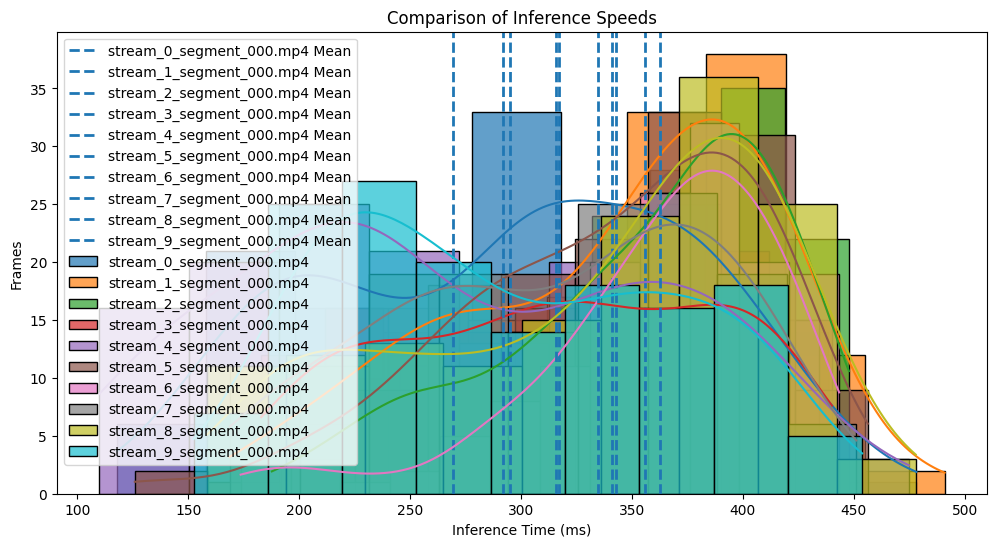

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_compare_distributions(data_dict):
    plt.figure(figsize=(12, 6))

    for video_path, inference_speeds in data_dict.items():
        # Plot the distribution using Seaborn for each video
        sns.histplot(inference_speeds, kde=True, label=f'{os.path.basename(video_path)}', alpha=0.7)

        # Calculate and plot the mean line for each video
        mean_speed = np.mean(inference_speeds)
        plt.axvline(mean_speed, linestyle='dashed', linewidth=2, label=f'{os.path.basename(video_path)} Mean')

    plt.xlabel('Inference Time (ms)')
    plt.ylabel('Frames')
    plt.title('Comparison of Inference Speeds')
    plt.legend()

    plt.show()

plot_compare_distributions(speeds)


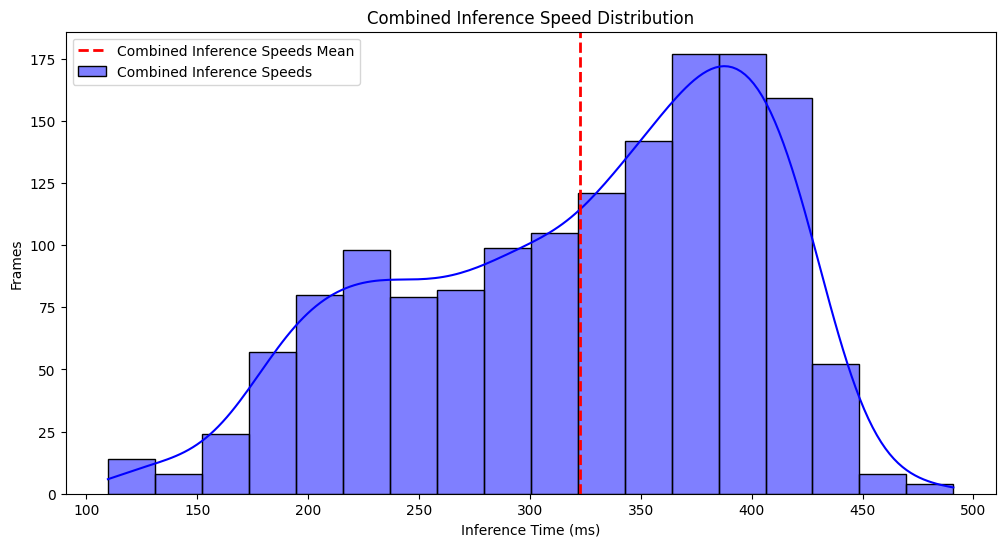

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_combined_distribution(data_dict, label='Combined Distribution'):
    combined_speeds = []

    for inference_speeds in data_dict.values():
        combined_speeds.extend(inference_speeds)

    plt.figure(figsize=(12, 6))

    # Plot the combined distribution using Seaborn
    sns.histplot(combined_speeds, kde=True, label=label, color='blue')

    # Calculate and plot the mean line for the combined data
    mean_speed = np.mean(combined_speeds)
    plt.axvline(mean_speed, linestyle='dashed', linewidth=2, label=f'{label} Mean', color='red')

    plt.xlabel('Inference Time (ms)')
    plt.ylabel('Frames')
    plt.title('Combined Inference Speed Distribution')
    plt.legend()

    plt.show()

plot_combined_distribution(speeds, label='Combined Inference Speeds')


In [69]:
# speeds = [float(i.speed['preprocess']+i.speed['inference']+i.speed['postprocess']) for i in results]

import matplotlib.pyplot as plt
import numpy as np

def plot_distribution(data):
    # Calculate mean and variance of the data
    mean = np.mean(data)
    variance = np.var(data)
    std_deviation = np.sqrt(variance)

    # Create a figure and axis for plotting
    plt.figure(figsize=(10, 6))

    # Plot the histogram of the data
    plt.hist(data, bins=20, density=True, alpha=0.7, color='blue', label='Data Distribution')

    # Plot lines for mean and ±2 standard deviations
    plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label='Mean')
    plt.axvline(mean + 2 * std_deviation, color='green', linestyle='dotted', linewidth=2, label='+2 Std Dev')
    plt.axvline(mean - 2 * std_deviation, color='green', linestyle='dotted', linewidth=2, label='-2 Std Dev')

    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title('Data Distribution with Mean and ±2 Std Deviations')
    plt.legend()

    plt.show()

# Example usage:
plot_distribution(speeds)


TypeError: unsupported operand type(s) for /: 'dict' and 'int'

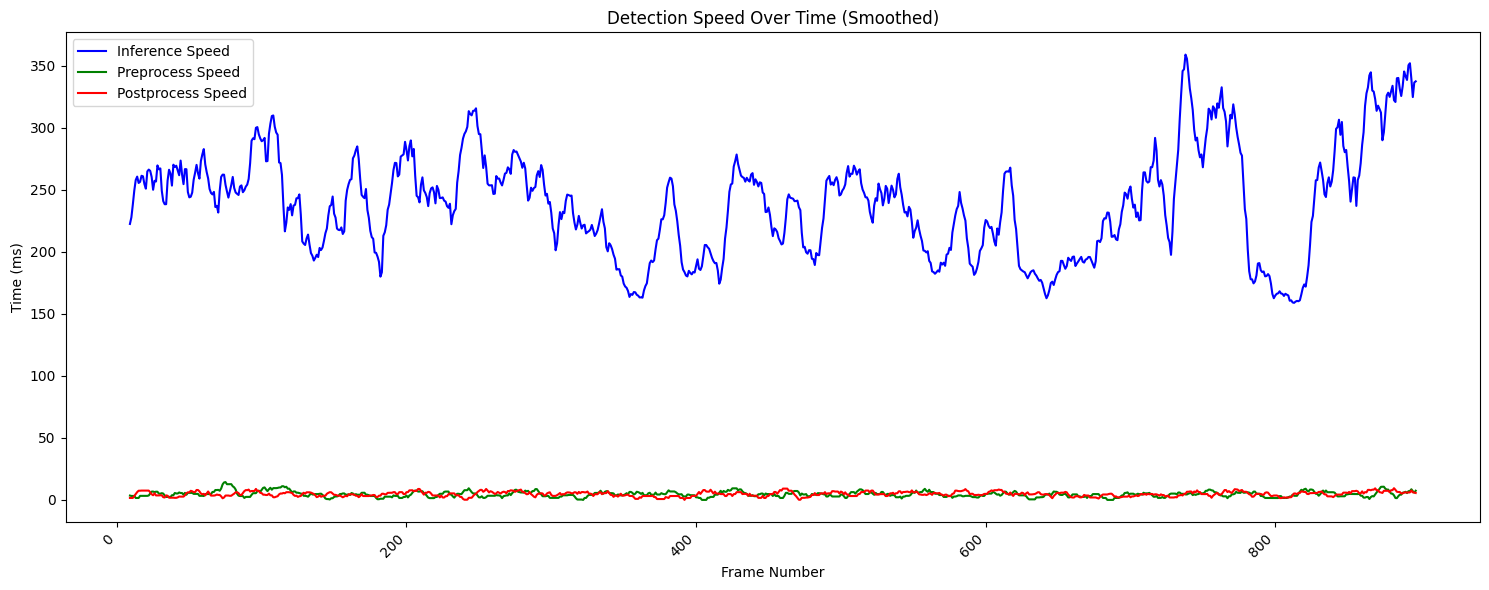

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract speeds from the results objects
preprocess_speeds = [result.speed['preprocess'] for result in results]
inference_speeds = [result.speed['inference'] for result in results]
postprocess_speeds = [result.speed['postprocess'] for result in results]

# Define a smoothing window size (adjust as needed)
smoothing_window = 10

# Calculate rolling averages for each speed category
preprocess_smoothed = [sum(preprocess_speeds[i:i+smoothing_window])/smoothing_window for i in range(len(preprocess_speeds) - smoothing_window + 1)]
inference_smoothed = [sum(inference_speeds[i:i+smoothing_window])/smoothing_window for i in range(len(inference_speeds) - smoothing_window + 1)]
postprocess_smoothed = [sum(postprocess_speeds[i:i+smoothing_window])/smoothing_window for i in range(len(postprocess_speeds) - smoothing_window + 1)]

# Create a count plot of speeds with indices on the x-axis
plt.figure(figsize=(15, 6))  # Adjust the figure size for better visualization

# Plot the smoothed inference speeds in blue
sns.lineplot(x=range(smoothing_window-1, len(inference_smoothed)+smoothing_window-1), y=inference_smoothed, color='blue', label='Inference Speed')

# Plot the smoothed preprocess speeds in green
sns.lineplot(x=range(smoothing_window-1, len(preprocess_smoothed)+smoothing_window-1), y=preprocess_smoothed, color='green', label='Preprocess Speed')

# Plot the smoothed postprocess speeds in red
sns.lineplot(x=range(smoothing_window-1, len(postprocess_smoothed)+smoothing_window-1), y=postprocess_smoothed, color='red', label='Postprocess Speed')

plt.xlabel('Frame Number')
plt.ylabel('Time (ms)')
plt.title('Detection Speed Over Time (Smoothed)')
plt.legend()  # Show legend with labels for each line

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()
